##Tabular Q-learning, deterministic, with PG

In [25]:
from sklearn.model_selection import ParameterGrid
from datetime import datetime 
import numpy as np
import pandas as pd
import gym

In [26]:
env = gym.make("FrozenLake-v0", is_slippery=False, map_name='8x8')
n_observations = env.observation_space.n
n_actions = env.action_space.n

#Initialize the Q-table to 0
Q_table = np.zeros((n_observations,n_actions))
#print(Q_table)

In [27]:
#number of episode we will run
n_episodes = 50000

#maximum of iteration per episode
max_iter_episode = 1000

#discounted factor
gamma = 0.95

#learning rate
lr = 0.001

#initialize the exploration probability to 1
epsilon = 1 #exploration_proba

#exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.001

# minimum of exploration proba
min_exploration_proba = 0.01

# Initialize list of rewards
rewards = np.zeros(n_episodes)

In [28]:
def grid_search_tabular(comb, lr, gamma, epsilon):
    # #sum the rewards that the agent gets from the environment
    rewards_per_episode = np.zeros(n_episodes)

    for e in range(n_episodes):
        #we initialize the first state of the episode
        current_state = env.reset()
        done = False

        for i in range(max_iter_episode): 
            # we sample a float from a uniform distribution over 0 and 1
            # if the sampled float is less than the exploration proba
            #     the agent selects arandom action
            # else
            #     he exploits his knowledge using the bellman equation 
            
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_table[current_state,:])
            
            # The environment runs the chosen action and returns
            # the next state, a reward and true if the epiosed is ended.
            next_state, reward, done, _ = env.step(action)
            
            # We update our Q-table using the Q-learning iteration
            Q_table[current_state, action] = (1-lr) * Q_table[current_state, action] +lr*(reward + gamma*max(Q_table[next_state,:]))
                    
            rewards_per_episode[e] += reward

            # If the episode is finished, we leave the for loop
            if done:
                break
            current_state = next_state

        
        #print("Done, iters, total_episode_reward:", done, aux, total_episode_reward) 

        #We update the exploration proba using exponential decay formula 
        epsilon = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
        
        # Add rewards for this episode
        #if done==True and rewards_per_episode[e]==0.0:
            #rewards_per_episode[e] = -1

    return rewards_per_episode
    

In [29]:
param_grid = {'lr': [0.01, 0.001, 0.0001], 'gamma': [0.8, 0.9, 1.0], 'epsilon':[1.0, 0.7, 0.5]}
table = pd.DataFrame(columns=['c', 'learning_rate', 'gamma', 'epsilon', 'wins', 'elapsed time (s)'])

comb = 0
rewards_per_model = []
np.random.seed(2)
env.seed(2)

for c in ParameterGrid(param_grid):
    print("Combination ", comb)

    tic = time.time()
    rewards = grid_search_tabular(comb, **c)
    toc = time.time()
    elapsed_time = toc - tic
    
    rewards_per_model.append(rewards)
    wins = (rewards > 0).sum()

    new_row = { 'c' : comb,
                'learning_rate': c['lr'],
                'gamma': c['gamma'],
                'epsilon': c['epsilon'],
                'wins': wins,
                'elapsed time (s)': elapsed_time}

    table = table.append(new_row, ignore_index=True) 
    comb += 1
    print(new_row) 


Combination  0
{'c': 0, 'learning_rate': 0.01, 'gamma': 0.8, 'epsilon': 1.0, 'wins': 0, 'elapsed time (s)': datetime.timedelta(seconds=195, microseconds=449070)}
Combination  1
{'c': 1, 'learning_rate': 0.001, 'gamma': 0.8, 'epsilon': 1.0, 'wins': 1, 'elapsed time (s)': datetime.timedelta(seconds=195, microseconds=470929)}
Combination  2
{'c': 2, 'learning_rate': 0.0001, 'gamma': 0.8, 'epsilon': 1.0, 'wins': 1, 'elapsed time (s)': datetime.timedelta(seconds=196, microseconds=958090)}
Combination  3
{'c': 3, 'learning_rate': 0.01, 'gamma': 0.9, 'epsilon': 1.0, 'wins': 0, 'elapsed time (s)': datetime.timedelta(seconds=197, microseconds=625378)}
Combination  4
{'c': 4, 'learning_rate': 0.001, 'gamma': 0.9, 'epsilon': 1.0, 'wins': 1, 'elapsed time (s)': datetime.timedelta(seconds=209, microseconds=510037)}
Combination  5
{'c': 5, 'learning_rate': 0.0001, 'gamma': 0.9, 'epsilon': 1.0, 'wins': 48165, 'elapsed time (s)': datetime.timedelta(seconds=32, microseconds=47725)}
Combination  6
{'c':

In [30]:
table

,c,learning_rate,gamma,epsilon,wins,elapsed time (s)
0,0,0.0100,0.8,1.0,0,0 days 00:03:15.449070
1,1,0.0010,0.8,1.0,1,0 days 00:03:15.470929
2,2,0.0001,0.8,1.0,1,0 days 00:03:16.958090
3,3,0.0100,0.9,1.0,0,0 days 00:03:17.625378
4,4,0.0010,0.9,1.0,1,0 days 00:03:29.510037
5,5,0.0001,0.9,1.0,48165,0 days 00:00:32.047725
6,6,0.0100,1.0,1.0,48159,0 days 00:00:32.137494
7,7,0.0010,1.0,1.0,48176,0 days 00:00:31.066491
8,8,0.0001,1.0,1.0,48192,0 days 00:00:29.895380
9,9,0.0100,0.8,0.7,47787,0 days 00:00:32.541544


##Tabular Q-learning, estochastic, with PG

In [65]:
from sklearn.model_selection import ParameterGrid
from datetime import datetime 
import numpy as np
import pandas as pd
import gym

In [66]:
env = gym.make("FrozenLake-v0", is_slippery=True, map_name='8x8')
n_observations = env.observation_space.n
n_actions = env.action_space.n

#Initialize the Q-table to 0
Q_table = np.zeros((n_observations,n_actions))
#print(Q_table)

In [67]:
#number of episode we will run
n_episodes = 50000

#maximum of iteration per episode
max_iter_episode = 1000

#discounted factor
gamma = 0.95

#learning rate
lr = 0.001

#initialize the exploration probability to 1
epsilon = 1 #exploration_proba

#exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.001

# minimum of exploration proba
min_exploration_proba = 0.01

# Initialize list of rewards
rewards = np.zeros(n_episodes)

In [68]:
def grid_search_tabular(comb, lr, gamma, epsilon):
    # #sum the rewards that the agent gets from the environment
    rewards_per_episode = np.zeros(n_episodes)

    for e in range(n_episodes):
        #we initialize the first state of the episode
        current_state = env.reset()
        done = False

        for i in range(max_iter_episode): 
            # we sample a float from a uniform distribution over 0 and 1
            # if the sampled float is less than the exploration proba
            #     the agent selects arandom action
            # else
            #     he exploits his knowledge using the bellman equation 
            
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_table[current_state,:])
            
            # The environment runs the chosen action and returns
            # the next state, a reward and true if the epiosed is ended.
            next_state, reward, done, _ = env.step(action)
            
            # We update our Q-table using the Q-learning iteration
            Q_table[current_state, action] = (1-lr) * Q_table[current_state, action] +lr*(reward + gamma*max(Q_table[next_state,:]))
                    
            rewards_per_episode[e] += reward

            # If the episode is finished, we leave the for loop
            if done:
                break
            current_state = next_state

        
        #print("Done, iters, total_episode_reward:", done, aux, total_episode_reward) 

        #We update the exploration proba using exponential decay formula 
        epsilon = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
        
        # Add rewards for this episode
        #if done==True and rewards_per_episode[e]==0.0:
            #rewards_per_episode[e] = -1

    return rewards_per_episode
    

In [69]:
param_grid = {'lr': [0.01, 0.001, 0.0001], 'gamma': [0.8, 0.9, 1.0], 'epsilon':[1.0, 0.7, 0.5]}
table = pd.DataFrame(columns=['c', 'learning_rate', 'gamma', 'epsilon', 'wins', 'elapsed time (s)'])

comb = 0
rewards_per_model = []
np.random.seed(2)
env.seed(2)

for c in ParameterGrid(param_grid):
    print("Combination ", comb)

    t0 = datetime.now()
    rewards = grid_search_tabular(comb, **c)
    elapsed_time = datetime.now() - t0
    
    rewards_per_model.append(rewards)
    wins = (rewards > 0).sum()

    new_row = { 'c' : comb,
                'learning_rate': c['lr'],
                'gamma': c['gamma'],
                'epsilon': c['epsilon'],
                'wins': wins,
                'elapsed time (s)': elapsed_time}

    table = table.append(new_row, ignore_index=True) 
    comb += 1
    print(new_row) 


Combination  0
{'c': 0, 'learning_rate': 0.01, 'gamma': 0.8, 'epsilon': 1.0, 'wins': 0, 'elapsed time (s)': datetime.timedelta(seconds=190, microseconds=909107)}
Combination  1
{'c': 1, 'learning_rate': 0.001, 'gamma': 0.8, 'epsilon': 1.0, 'wins': 1, 'elapsed time (s)': datetime.timedelta(seconds=194, microseconds=517206)}
Combination  2
{'c': 2, 'learning_rate': 0.0001, 'gamma': 0.8, 'epsilon': 1.0, 'wins': 1525, 'elapsed time (s)': datetime.timedelta(seconds=88, microseconds=188245)}
Combination  3
{'c': 3, 'learning_rate': 0.01, 'gamma': 0.9, 'epsilon': 1.0, 'wins': 2041, 'elapsed time (s)': datetime.timedelta(seconds=89, microseconds=22754)}
Combination  4
{'c': 4, 'learning_rate': 0.001, 'gamma': 0.9, 'epsilon': 1.0, 'wins': 3797, 'elapsed time (s)': datetime.timedelta(seconds=119, microseconds=784923)}
Combination  5
{'c': 5, 'learning_rate': 0.0001, 'gamma': 0.9, 'epsilon': 1.0, 'wins': 3735, 'elapsed time (s)': datetime.timedelta(seconds=120, microseconds=575206)}
Combination  

In [70]:
table

,c,learning_rate,gamma,epsilon,wins,elapsed time (s)
0,0,0.0100,0.8,1.0,0,0 days 00:03:10.909107
1,1,0.0010,0.8,1.0,1,0 days 00:03:14.517206
2,2,0.0001,0.8,1.0,1525,0 days 00:01:28.188245
3,3,0.0100,0.9,1.0,2041,0 days 00:01:29.022754
4,4,0.0010,0.9,1.0,3797,0 days 00:01:59.784923
5,5,0.0001,0.9,1.0,3735,0 days 00:02:00.575206
6,6,0.0100,1.0,1.0,9220,0 days 00:01:55.670575
7,7,0.0010,1.0,1.0,11739,0 days 00:02:09.783734
8,8,0.0001,1.0,1.0,11852,0 days 00:02:05.602717
9,9,0.0100,0.8,0.7,15947,0 days 00:01:37.151361


In [71]:
def make_directory(directory):
	if not os.path.exists(directory):
		os.makedirs(directory)

# to store the values of episodes
rewards_folder = 'linear_ql_rewards_tabest'
make_directory(rewards_folder)

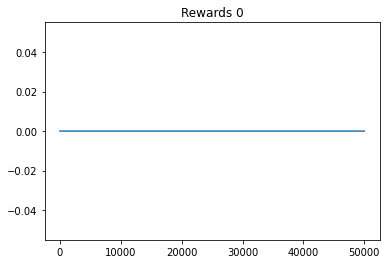

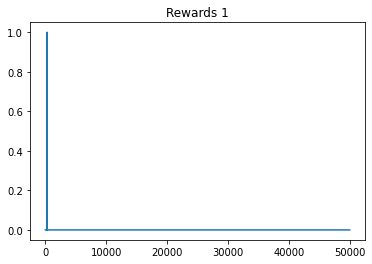

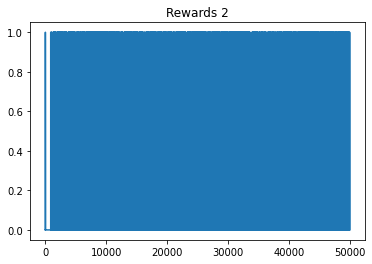

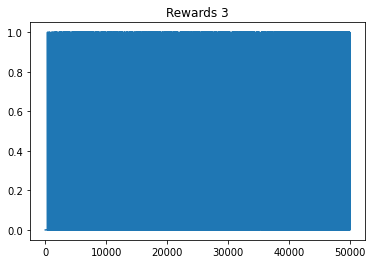

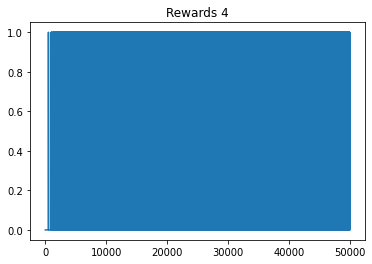

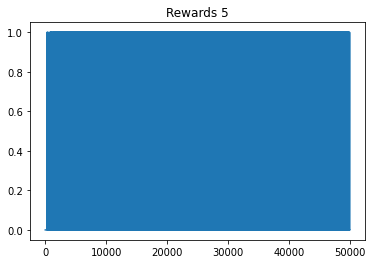

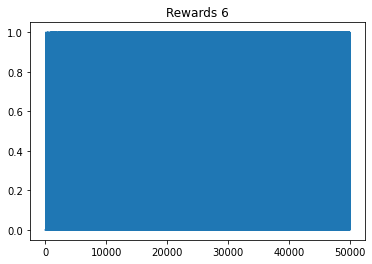

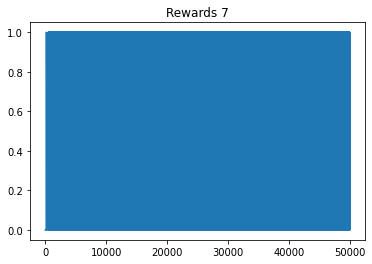

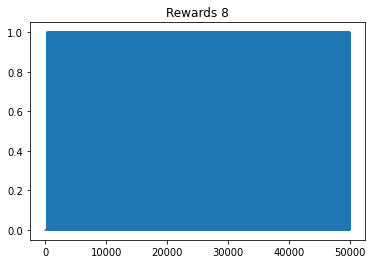

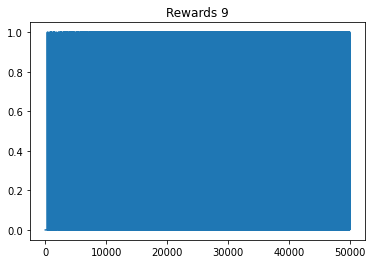

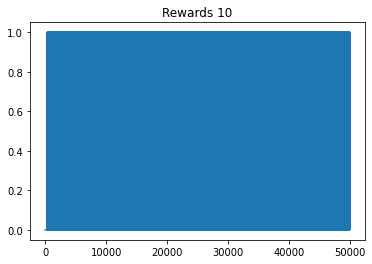

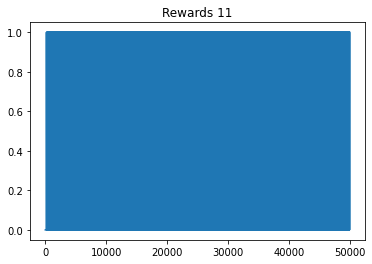

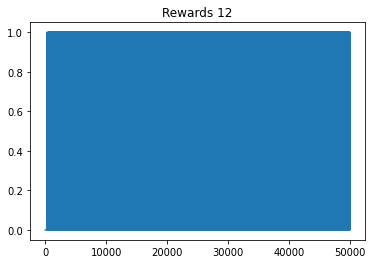

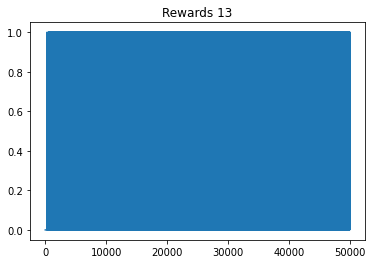

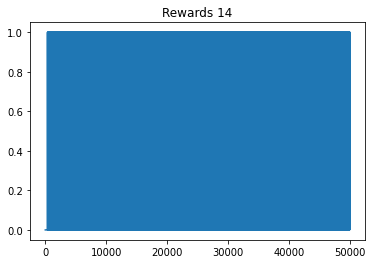

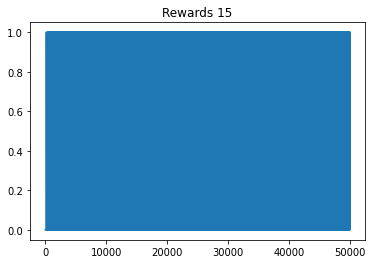

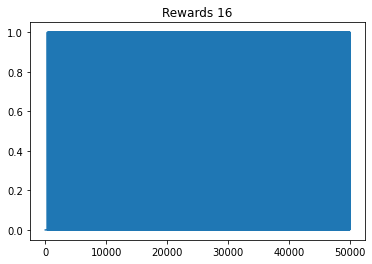

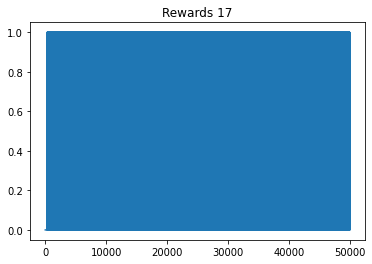

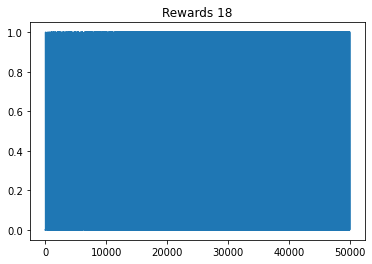

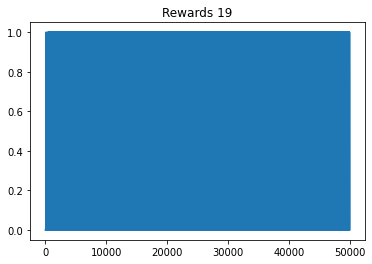

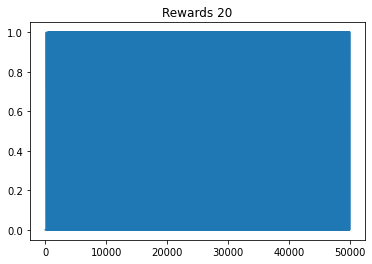

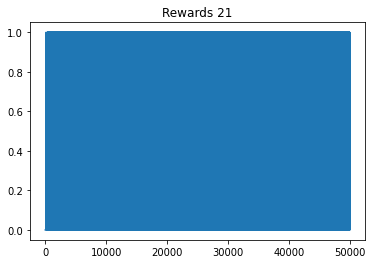

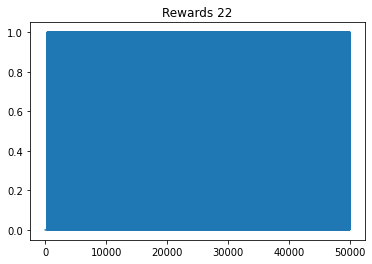

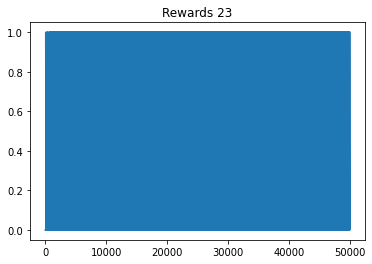

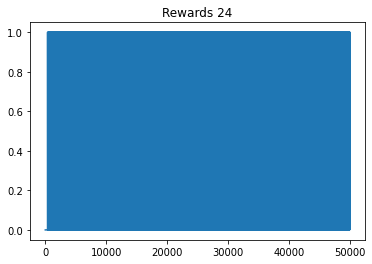

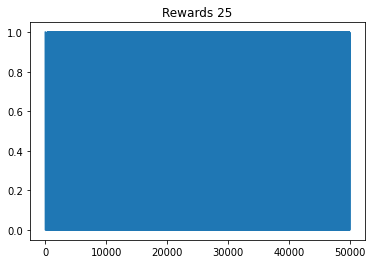

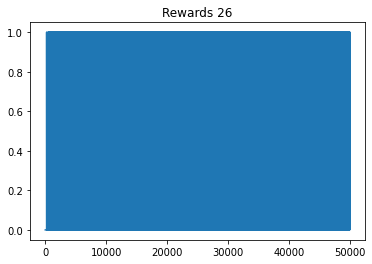

In [72]:
for i in range(len(rewards_per_model)):
    lis = rewards_per_model[i]
    plt.plot(lis)
    plt.title("Rewards "+str(i))
    plt.savefig(f'{rewards_folder}/RewardPlot_tabest'+str(i))
    plt.show()

In [73]:
!zip -r /content/linear_ql_rewards_tabest.zip /content/linear_ql_rewards_tabest

from google.colab import files
files.download("/content/linear_ql_rewards_tabest.zip")

  adding: content/linear_ql_rewards_tabest/ (stored 0%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest1.png (deflated 19%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest8.png (deflated 14%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest2.png (deflated 12%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest5.png (deflated 14%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest6.png (deflated 16%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest26.png (deflated 14%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest19.png (deflated 15%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest13.png (deflated 14%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest16.png (deflated 14%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest18.png (deflated 13%)
  adding: content/linear_ql_rewards_tabest/RewardPlot_tabest11.png (deflated 14%)
  adding: content/linear_ql_rewards_tabest/Rewa

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Q-learning with linear function approximator v0.1 - 2da ejecución

In [ ]:
import gym
 
actions_names = {
    'Left': 0,
    'Down': 1,
    'Right': 2, 
    'Up': 3
}
  
env = gym.make("FrozenLake-v0", is_slippery=False, map_name='8x8')
env.reset()

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle
import time


class LinearModel:
	# Linear Regression
	def __init__(self,n_features, action_dim):
		self.W = np.random.randn(n_features)# / np.sqrt(n_features)
		self.b = 0

		# momentum terms 
		self.vW = 0
		self.vb = 0

		self.losses = []	

	def predict(self,X):		
		return X.dot(self.W) + self.b

	def sgd(self, X, Y, learning_rate=0.01, momentum=0.9): # Stochastic gradent descent
		Yhat= self.predict(X)
		gW= 2*X.T.dot(Yhat - Y)
		gb= 2*(Yhat-Y).sum(axis=0)

		self.vW = momentum * self.vW - learning_rate * gW
		self.vb = momentum * self.vb - learning_rate * gb 

		self.W +=  self.vW
		self.b +=  self.vb

		mse = np.mean((Yhat-Y)**2)
		self.losses.append(mse)

	def predict2(self,X):
		nacts = self.W.shape[1]
		res = np.zeros(nacts)
		for i in range(nacts):
			dot = X[i].dot(self.W[:,i])
			res[i] = dot + self.b[i]
		return res

	def sgd2(self, X, Y, learning_rate=0.01, momentum=0.9): # Stochastic gradent descent
		assert(len(X.shape)==2)

		num_values=np.prod(Y.shape) # 4 values , 4 actions

		Yhat= self.predict(X)
		gW= 2*X.T.dot(Yhat - Y)/num_values
		gb= 2*(Yhat-Y).sum(axis=0)/num_values

		self.vW = momentum * self.vW - learning_rate * gW
		self.vb = momentum * self.vb - learning_rate * gb 

		self.W +=  self.vW
		self.b +=  self.vb

		mse = np.mean((Yhat-Y)**2)
		self.losses.append(mse)

	def save_weights(self,filepath):
		np.savez(filepath, W=self.W, b=self.b)

	def load_weights(self,filepath):
		npz = np.load(filepath)
		self.W = npz['W']
		self.b = npz['b']

In [ ]:
def scaling(env):
	list_of_states= []
	done = False
	while not done:
		action = np.random.choice(actions)
		state, reward, done, info =env.step(action)

		list_of_states.append([state])

	scaler=StandardScaler()
	scaler.fit(list_of_states)
	return scaler

In [ ]:
scaler = scaling(env) 

In [ ]:
def make_directory(directory):
	if not os.path.exists(directory):
		os.makedirs(directory)
  
def load(name):
	model.load_weights(name)

def save(name):
	model.save_weights(name)
  
def _next_position(row, col, action):
    if action == 0:
        row_next, col_next = row, col - 1
    elif action == 1:
        row_next, col_next = row + 1, col
    elif action == 2:
        row_next, col_next = row, col + 1
    elif action == 3:
        row_next, col_next = row - 1, col

    row_next = max(0, min(row_next, 7))
    col_next = max(0, min(col_next, 7))

    return row_next, col_next

def getFeatures(state, action):
	n_rows, n_cols = (8, 8)

	row, col = state // n_rows, state % n_cols

	row_next, col_next = _next_position(row, col, action)

	row, col = row / (n_rows - 1), col / (n_cols - 1)
	state_features = np.array([row, col, row * col,
							row**2, col**2,
							row**3, col**3,
							row**4, col**4])
	
	row_next, col_next = row_next / (n_rows - 1), col_next / (n_cols - 1)
	action_features = np.array([row_next, col_next, row_next * col_next,
							row_next**2, col_next**2,
							row_next**3, col_next**3,
							row_next**4, col_next**4])

	features = np.concatenate(
		[[1.0], state_features, action_features])
 
	#features = np.reshape(features,(1, features.size))
	return features

def FindActio2n(state, actions):
	rand = np.random.rand()
	if rand <= epsilon:
		return np.random.choice(action_size) # return random action with probability epsilon
	
	action_values = np.zeros((action_size, n_features))
	
	for action in actions:
		x = getFeatures(state, action)
		action_values[action] = x
	
	qvalues = model.predict(action_values) 
 
	return np.argmax(qvalues)
 
def FindAction(state, actions):
	rand = np.random.rand()
	if rand <= epsilon:
		return np.random.choice(action_size) # return random action with probability epsilon
	
	qvalues = np.zeros(action_size)
	
	for action in actions:
		x = getFeatures(state, action)
		qvalues[action] = model.predict(x)
 
	return  np.argmax(qvalues)
 

def train(state, action, reward, next_state, done, epsilon):
	if done:
		target = reward
	else:  
		preds = np.zeros(action_size)
		for a in range(action_size):
			preds[a] = model.predict(next_state)	
   
		target = reward + gamma * np.amax(preds) # Q-Learning
		# compute the official one-step Bellman backup updates	
	
	#target_full = model.predict(state) # Get the values based on the old parameters W,b
	#target_full[0,action] = target # update the entry of the corresponding action # this (1,4)

	#model.sgd(state, target_full) # Stochastic gradient descent. Run one training step and update W, b
	model.sgd(state, target) # Stochastic gradient descent. Run one training step and update W, b
	if epsilon > epsilon_min: # decrease the probability of exploration
		epsilon *= epsilon_decay
	
	return target

In [ ]:
def play_one_episode( env, is_train, stats, e):

    #state = scaler.transform([[state]]) # scale the state vector
    state = env.reset() # get the initial state 
    actions = np.arange(number_actions)
    done = False

    action = FindAction(state, actions)   
    statef = getFeatures(state, action) 
   
    aux = 0

    while not done:
                
        next_state, reward, done, info = env.step(action)

        action_next = FindAction(next_state, actions)
        next_statef = getFeatures(next_state, action_next)

        #next_state = scaler.transform([[next_state]]) # scale the next state
        if is_train == 'train': # if the mode is training
            train(statef, action, reward, next_statef, done, epsilon) # Q-Learning with states' aggregation
        
        statef = next_statef # got to next state
        action = action_next

        stats[e] += reward
         

        aux += 1
    return reward

    #return info['current value']

In [ ]:
from sklearn.preprocessing import StandardScaler
from datetime import datetime 
import numpy as np

state_size = env.observation_space.n  # env.state_dimension # initialize state dimension
n_features = 19
action_size = env.action_space.n  # initialize actions dimension

momentum=0.9
learning_rate=0.01
gamma = 0.95 # discount factor
epsilon = 0.5 # exploration
epsilon_min = 0.01
epsilon_decay = 0.995

number_actions = env.nA
actions = np.arange(number_actions)

num_episodes= 20000 # epochs
mode = 'train'
model = LinearModel(n_features, action_size)



In [ ]:
models_folder = 'linear_rl_model' # to store the Q-model prarameters
rewards_folder = 'linear_rl_rewards' # to store the values of episodes
make_directory(models_folder)
make_directory(rewards_folder)

num_episodes = 50000
stats = np.zeros(num_episodes)
#np.random.seed(42)
#env.seed(42)

if mode == 'test':
	# remake the env with the test data
	#env = StockEnv(test_data, initial_investment)
	load(f'{models_folder}/linear.npz')

for e in range(num_episodes):
	t0 = datetime.now()
	r = play_one_episode(env, 'train', stats, e)
	dt = datetime.now() - t0

	
	#if reward == 1:
		#env.render()
		#time.sleep(0.1)   
	#if e % 100 == 0:
		#print(f"episode: {e +1}/{num_episodes}, reward: {r:.2f}, duration: {dt}")
	if r > 0.0:
		print(f"Win episode: {e +1}/{num_episodes}, reward: {r:.2f}, duration: {dt}")
	save(f'{models_folder}/linear.npz')

plt.plot(model.losses)
plt.title("Losses of the "+mode+" model")
plt.show()

plt.plot(stats)
plt.title("Rewards "+mode+" model")
plt.show()


In [ ]:
def print_state_values_approximator(size=8):
        
    print("\n\t\t State Value")
    
    s = 0
    for _ in range(size):
        
        print("------------------------------------------------")

        for _ in range(size):
            
            # Get the max value for state
            # Get the max value for state
            qvalues = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                x = getFeatures(s, a)
                qvalues[a] = model.predict(x) 
            
            v = np.max(qvalues)
            
            if v >= 0:
                print(" %.4f|" % v, end="")
            else:
                print("%.4f|" % v, end="")
                
            s += 1
            
        print("")
        
    print("------------------------------------------------")

In [ ]:
def print_policy_approximator(size=8):
          
    actions_names = ['l', 's', 'r', 'n']
    
    s = 0
    
    print("\n\t\t Policy/Actions")

    for _ in range(size):
        print("------------------------------------------------")

        for _ in range(size):
            
            # Get the max value for state
            qvalues = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                x = getFeatures(s, a)
                qvalues[a] = model.predict(x)     
            
            # Get the best action
            best_action = np.argmax(qvalues)

            s += 1
            print("  %s  |" % actions_names[best_action], end="")
            
        print("")
        
    print("------------------------------------------------")

In [ ]:
print_policy_approximator()

In [ ]:
print_state_values_approximator()

## Q-learning with lfa, stochastic, f=s+a (weights vector)  with PG

In [31]:
import gym
 
actions_names = {
    'Left': 0,
    'Down': 1,    
    'Right': 2, 
    'Up': 3
}
  
env = gym.make("FrozenLake-v0", is_slippery=True, map_name='8x8')
env.reset()

0

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle
import time

In [33]:
class LinearModel:
	# Linear Regression
	def __init__(self,n_features, action_dim, learning_rate=0.01, momentum=0.9):
		self.W = np.random.randn(n_features)
		self.b = 0

		# parameters
		self.learning_rate = learning_rate
		self.momentum = momentum

		# momentum terms 
		self.vW = 0
		self.vb = 0

		self.losses = []	

	def predict(self,X):		
		return X.dot(self.W) + self.b

	def sgd(self, X, Y):
		Yhat= self.predict(X)
		
		gW= 2*X.T.dot(Yhat - Y)
		gb= 2*(Yhat-Y)

		self.vW = self.momentum * self.vW - self.learning_rate * gW
		self.vb = self.momentum * self.vb - self.learning_rate * gb 

		self.W +=  self.vW
		self.b +=  self.vb

		mse = np.mean((Yhat-Y)**2)
		self.losses.append(mse)

	def save_weights(self,filepath):
		np.savez(filepath, W=self.W, b=self.b)

	def load_weights(self,filepath):
		npz = np.load(filepath)
		self.W = npz['W']
		self.b = npz['b']

In [34]:
def make_directory(directory):
	if not os.path.exists(directory):
		os.makedirs(directory)
  
def load(name):
	model.load_weights(name)

def save(name):
	model.save_weights(name)
  
def _next_position(row, col, action):
    if action == 0:
        row_next, col_next = row, col - 1
    elif action == 1:
        row_next, col_next = row + 1, col
    elif action == 2:
        row_next, col_next = row, col + 1
    elif action == 3:
        row_next, col_next = row - 1, col

    row_next = max(0, min(row_next, 7))
    col_next = max(0, min(col_next, 7))

    return row_next, col_next

def getFeatures(state, action):
	n_rows, n_cols = (8, 8)

	row, col = state // n_rows, state % n_cols

	row_next, col_next = _next_position(row, col, action)

	row, col = row / (n_rows - 1), col / (n_cols - 1)
	state_features = np.array([row, col, row * col,
							row**2, col**2,
							row**3, col**3,
							row**4, col**4])
	
	row_next, col_next = row_next / (n_rows - 1), col_next / (n_cols - 1)
	action_features = np.array([row_next, col_next, row_next * col_next,
							row_next**2, col_next**2,
							row_next**3, col_next**3,
							row_next**4, col_next**4])

	features = np.concatenate(
		[[1.0], state_features, action_features]) 
	
	return features


def FindAction(state, actions, model, epsilon):
	rand = np.random.rand()
	if rand <= epsilon:
		return np.random.choice(action_size) # return random action with probability epsilon
	
	qvalues = np.zeros(action_size)
	
	for action in actions:
		x = getFeatures(state, action)
		qvalues[action] = model.predict(x)
 
	return  np.argmax(qvalues)
 

def train(statef, action, reward, next_state, done, epsilon, gamma, model):
	if done:
		target = reward
	else:  
		preds = np.zeros(action_size)
		for a in range(action_size):
			preds[a] = model.predict(next_state)	
   
		# compute the official one-step Bellman backup updates	
		target = reward + gamma * np.amax(preds) # Q-Learning
		
	# Stochastic gradient descent. Run one training step and update W, b
	model.sgd(statef, target)
	
	# decrease the probability of exploration
	if epsilon > epsilon_min: 
		epsilon *= epsilon_decay

In [35]:
def play_one_episode( env, rewards, gamma, epsilon, model, e):
    
    state = env.reset()
    actions = np.arange(number_actions)
    done = False

    action = FindAction(state, actions, model, epsilon)   
    statef = getFeatures(state, action) 

    while not done:                
        next_state, reward, done, info = env.step(action)

        action_next = FindAction(next_state, actions, model, epsilon)
        next_statef = getFeatures(next_state, action_next)

        train(statef, action, reward, next_statef, done, epsilon, gamma, model) # Q-Learning with states' aggregation
        
        statef = next_statef
        action = action_next

        rewards[e] += reward
    
    #if done==True and rewards[e]==0.0:
     #   rewards[e] = -1

In [36]:
from sklearn.model_selection import ParameterGrid
from datetime import datetime 
import numpy as np

# to store the Q-model prarameters
models_folder = 'linear_rl_model' 
make_directory(models_folder)

state_size = env.observation_space.n

n_features = 19
#n_features = 9 # (only state features)

action_size = env.action_space.n

epsilon_min = 0.01
epsilon_decay = 0.995

number_actions = env.nA
actions = np.arange(number_actions)

num_episodes= 20000
mode = 'train'

In [37]:
def grid_search_approximator(comb, learning_rate, gamma, epsilon, momentum):
    momentum = momentum
    learning_rate = learning_rate
    gamma = gamma
    epsilon = epsilon
    rewards = np.zeros(num_episodes)

    model = LinearModel(n_features, action_size, learning_rate= learning_rate, momentum= momentum)

    for e in range(num_episodes):        
        play_one_episode(env, rewards, gamma, epsilon, model, e)
        

        #if rewards[e] > 0.0:
            #print(f"Win episode: {e +1}/{num_episodes}, reward: {rewards[e]:.2f}, duration: {dt}")

    #save(f'{models_folder}/linear'+str(comb)+'.npz')

    return rewards, model.losses

In [38]:
param_grid = {'learning_rate': [0.01, 0.001, 0.0001], 'gamma': [0.85, 0.95, 1.0], 'epsilon':[1.0, 0.7, 0.5], 'momentum': [ 0.7, 0.9]}
    
table = pd.DataFrame(columns=['c', 'learning_rate', 'gamma', 'epsilon', 'momentum', 'wins', 'avg loss', 'elapsed time (s)'])

comb = 0
rewards_per_model = []
loss_per_model = []
np.random.seed(2)
env.seed(2)

for c in ParameterGrid(param_grid):
    print("Combination ", comb)
    tic = time.time()
    rewards, losses = grid_search_approximator(comb, **c)
    toc = time.time()
    elapsed_time = toc - tic

    rewards_per_model.append(rewards)
    loss_per_model.append(losses)
    avr_loss = np.mean(losses)
    wins = (rewards > 0).sum()

    new_row = { 'c' : comb,
                'learning_rate': c['learning_rate'],
                'gamma': c['gamma'],
                'epsilon': c['epsilon'],
                'momentum': c['momentum'],
                'wins': wins,
                'avg loss': avr_loss,
                'elapsed time (s)': elapsed_time}

    table = table.append(new_row, ignore_index=True) 
    comb += 1
    print(new_row)   

Combination  0
{'c': 0, 'learning_rate': 0.01, 'gamma': 0.85, 'epsilon': 0.5, 'momentum': 0.7, 'wins': 36, 'avg loss': 0.0004465256102122897, 'elapsed time (s)': datetime.timedelta(seconds=110, microseconds=343063)}
Combination  1
{'c': 1, 'learning_rate': 0.01, 'gamma': 0.85, 'epsilon': 0.5, 'momentum': 0.9, 'wins': 17, 'avg loss': 0.0001752919709790662, 'elapsed time (s)': datetime.timedelta(seconds=88, microseconds=372020)}
Combination  2
{'c': 2, 'learning_rate': 0.001, 'gamma': 0.85, 'epsilon': 0.5, 'momentum': 0.7, 'wins': 88, 'avg loss': 0.002141277765773334, 'elapsed time (s)': datetime.timedelta(seconds=115, microseconds=54069)}
Combination  3
{'c': 3, 'learning_rate': 0.001, 'gamma': 0.85, 'epsilon': 0.5, 'momentum': 0.9, 'wins': 94, 'avg loss': 0.0008512796357225893, 'elapsed time (s)': datetime.timedelta(seconds=101, microseconds=597621)}
Combination  4
{'c': 4, 'learning_rate': 0.0001, 'gamma': 0.85, 'epsilon': 0.5, 'momentum': 0.7, 'wins': 5, 'avg loss': 0.016913841615014

KeyboardInterrupt: ignored

In [39]:
table

,c,learning_rate,gamma,epsilon,momentum,wins,avg loss,elapsed time (s)
0,0,0.0100,0.85,0.5,0.7,36,0.000447,0 days 00:01:50.343063
1,1,0.0100,0.85,0.5,0.9,17,0.000175,0 days 00:01:28.372020
2,2,0.0010,0.85,0.5,0.7,88,0.002141,0 days 00:01:55.054069
3,3,0.0010,0.85,0.5,0.9,94,0.000851,0 days 00:01:41.597621
4,4,0.0001,0.85,0.5,0.7,5,0.016914,0 days 00:01:36.829892
5,5,0.0001,0.85,0.5,0.9,9,0.004392,0 days 00:01:42.173518
6,6,0.0100,0.95,0.5,0.7,31,0.000549,0 days 00:01:35.122679
7,7,0.0100,0.95,0.5,0.9,23,0.000339,0 days 00:01:29.291692
8,8,0.0010,0.95,0.5,0.7,66,0.001110,0 days 00:01:56.041297
9,9,0.0010,0.95,0.5,0.9,5,0.001259,0 days 00:01:28.567538


In [40]:
def make_directory(directory):
	if not os.path.exists(directory):
		os.makedirs(directory)

# to store the values of episodes
losses_folder = 'linear_ql_losses'
make_directory(losses_folder)
rewards_folder = 'linear_ql_rewards'
make_directory(rewards_folder)

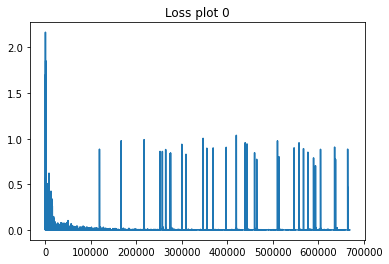

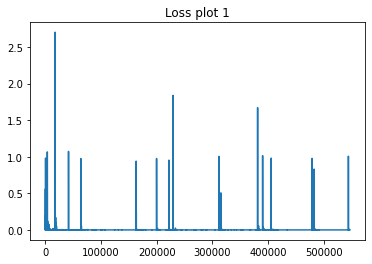

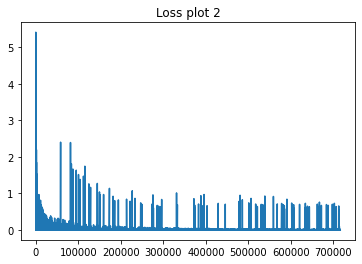

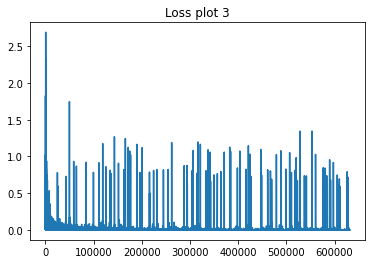

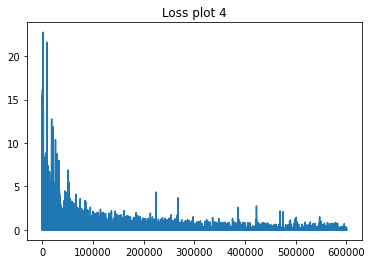

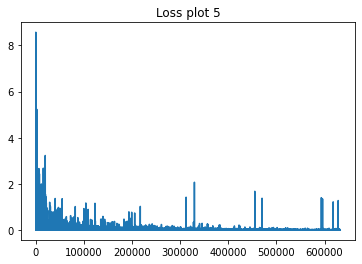

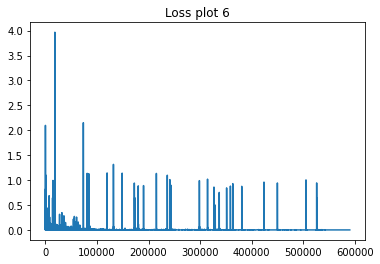

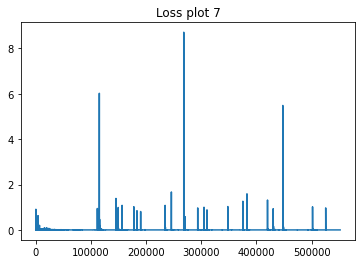

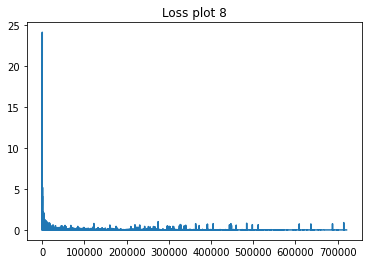

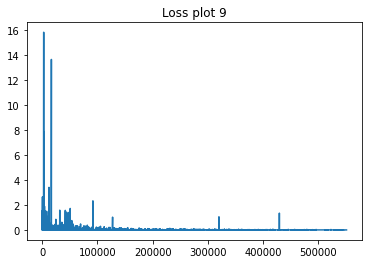

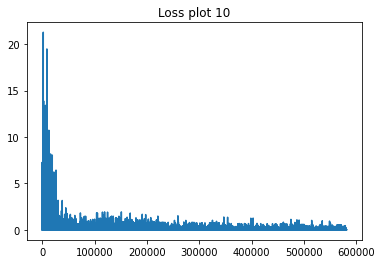

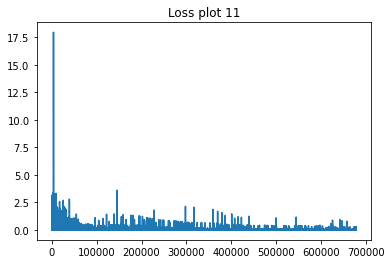

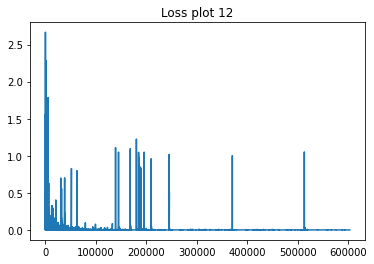

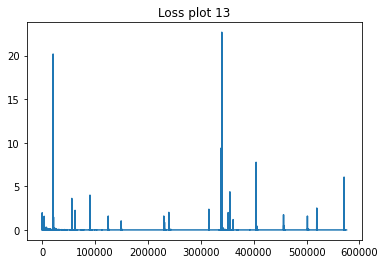

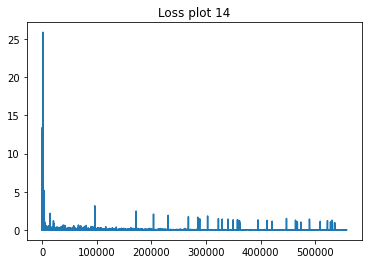

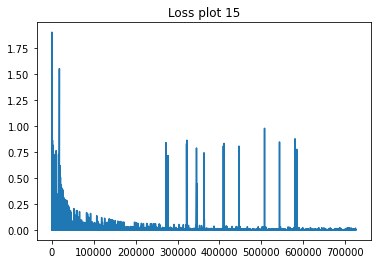

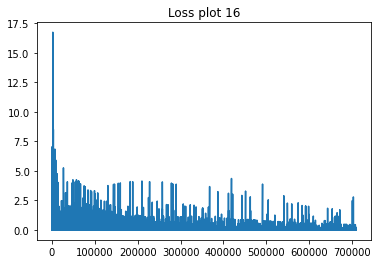

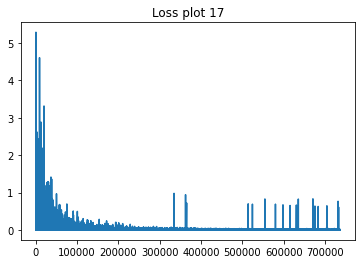

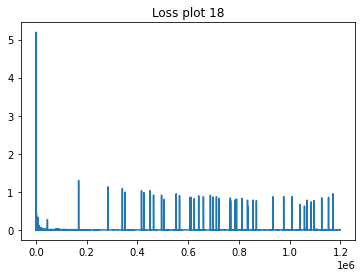

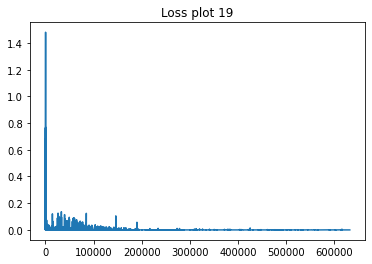

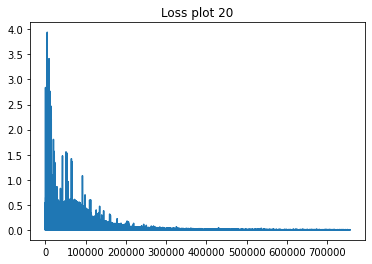

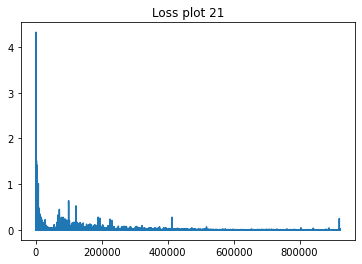

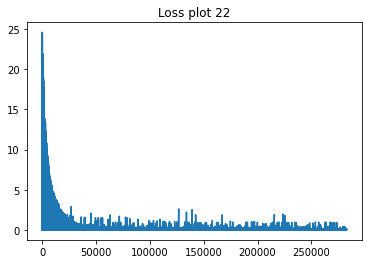

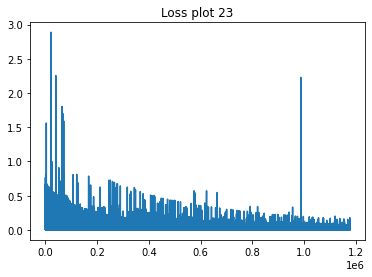

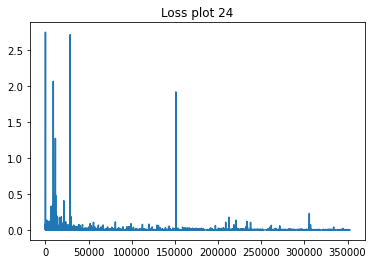

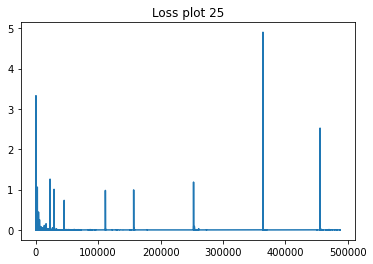

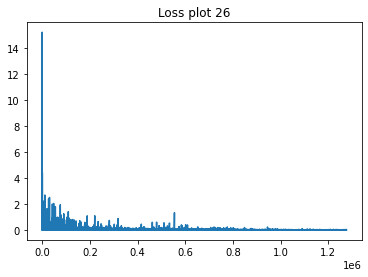

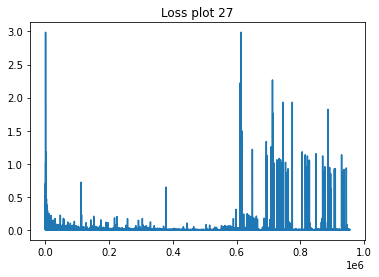

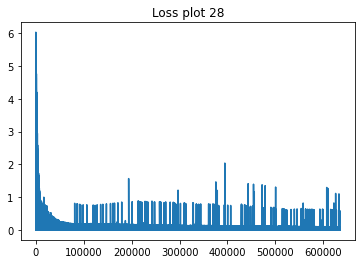

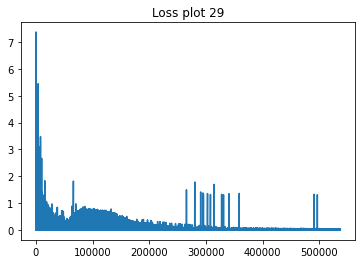

In [42]:
for i in range(len(loss_per_model)):
    lis = loss_per_model[i]
    plt.plot(lis)
    plt.title("Loss plot "+str(i))
    plt.savefig(f'{losses_folder}/LossPlot_lfaestwv'+str(i))
    plt.show()

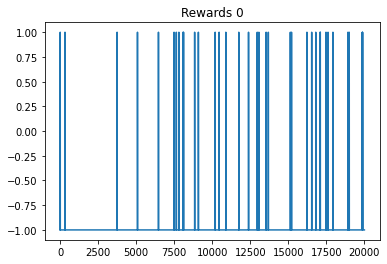

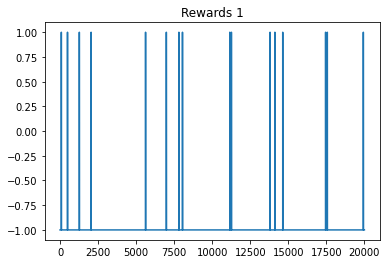

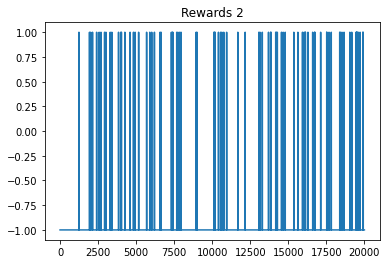

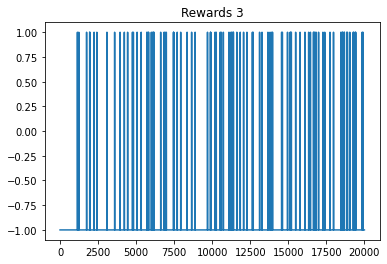

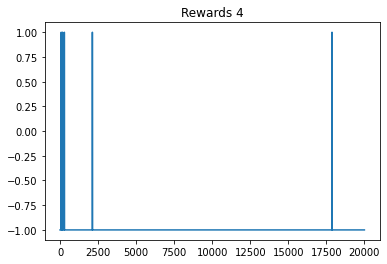

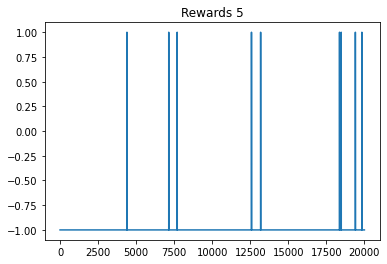

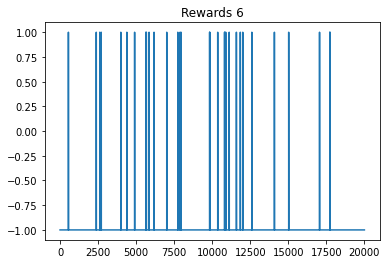

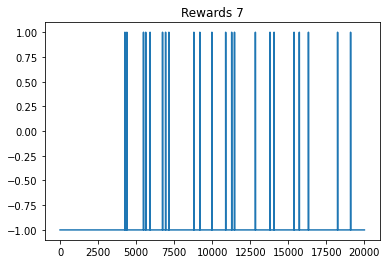

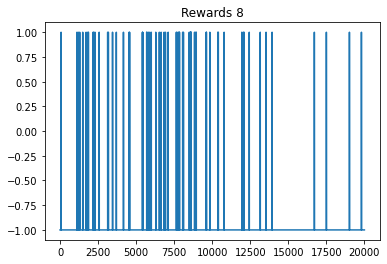

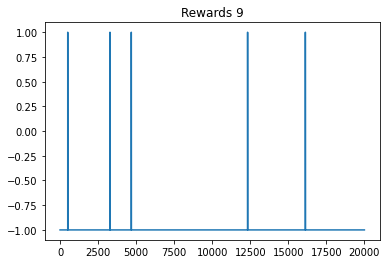

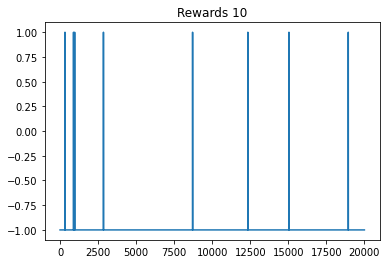

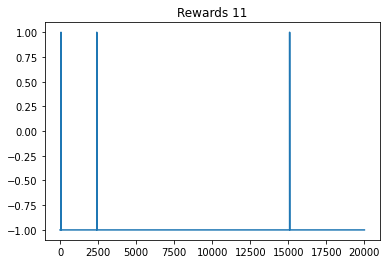

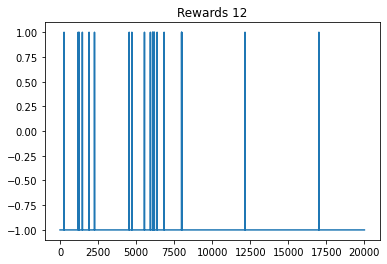

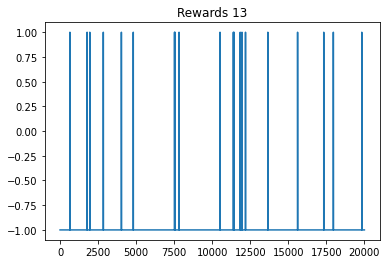

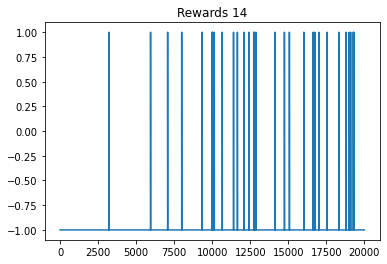

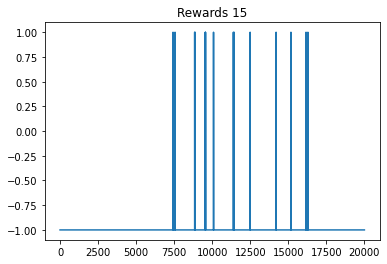

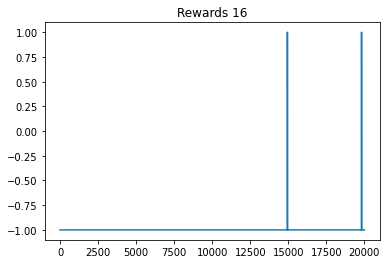

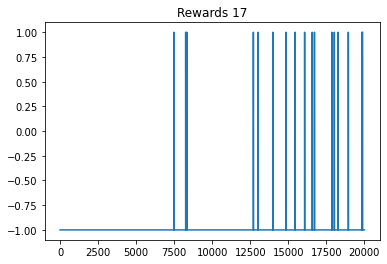

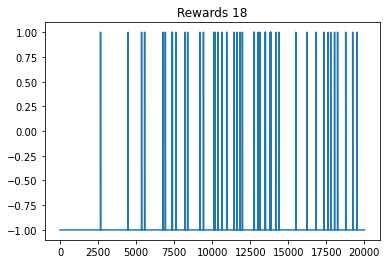

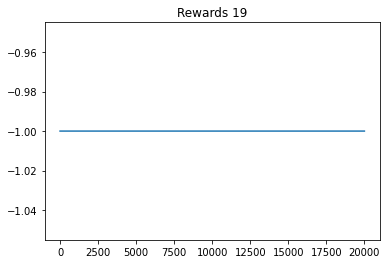

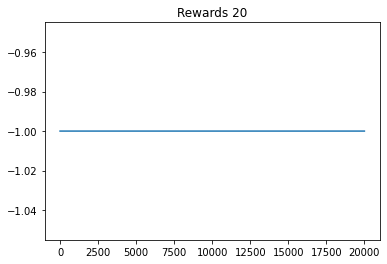

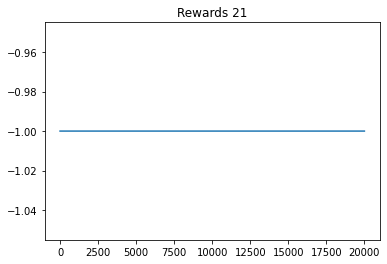

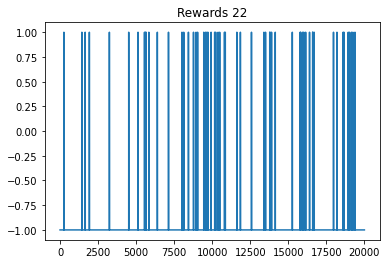

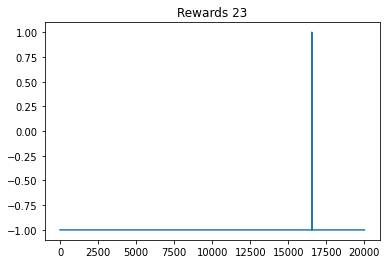

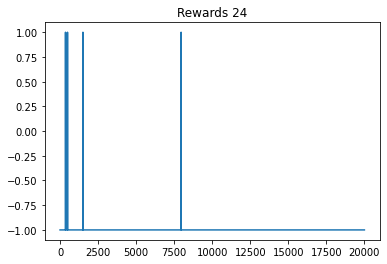

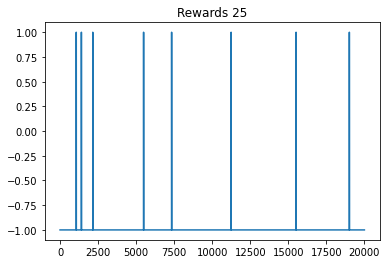

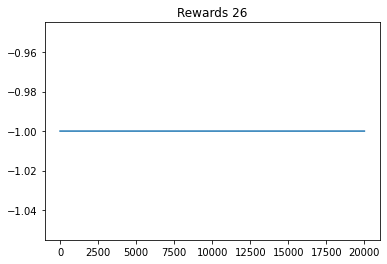

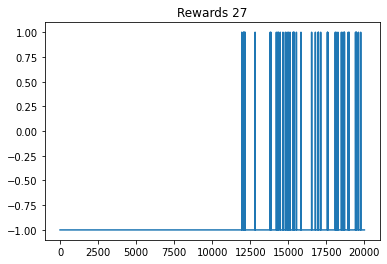

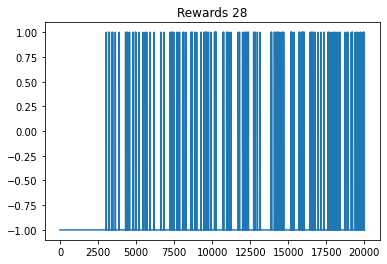

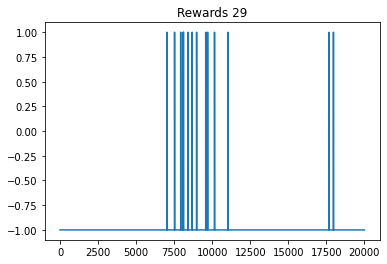

In [43]:
for i in range(len(rewards_per_model)):
    lis = rewards_per_model[i]
    plt.plot(lis)
    plt.title("Rewards "+str(i))
    plt.savefig(f'{rewards_folder}/RewardPlot_lfaestwv'+str(i))
    plt.show()

## Q-learning with lfa, deterministic, f=s+a (weights vector)  with PG

In [44]:
import gym
 
actions_names = {
    'Left': 0,
    'Down': 1,    
    'Right': 2, 
    'Up': 3
}
  
env = gym.make("FrozenLake-v0", is_slippery=False, map_name='8x8')
env.reset()

0

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle
import time

In [46]:
class LinearModel:
	# Linear Regression
	def __init__(self,n_features, action_dim, learning_rate=0.01, momentum=0.9):
		self.W = np.random.randn(n_features)
		self.b = 0

		# parameters
		self.learning_rate = learning_rate
		self.momentum = momentum

		# momentum terms 
		self.vW = 0
		self.vb = 0

		self.losses = []	

	def predict(self,X):		
		return X.dot(self.W) + self.b

	def sgd(self, X, Y):
		Yhat= self.predict(X)
		
		gW= 2*X.T.dot(Yhat - Y)
		gb= 2*(Yhat-Y)

		self.vW = self.momentum * self.vW - self.learning_rate * gW
		self.vb = self.momentum * self.vb - self.learning_rate * gb 

		self.W +=  self.vW
		self.b +=  self.vb

		mse = np.mean((Yhat-Y)**2)
		self.losses.append(mse)

	def save_weights(self,filepath):
		np.savez(filepath, W=self.W, b=self.b)

	def load_weights(self,filepath):
		npz = np.load(filepath)
		self.W = npz['W']
		self.b = npz['b']

In [47]:
def make_directory(directory):
	if not os.path.exists(directory):
		os.makedirs(directory)
  
def load(name):
	model.load_weights(name)

def save(name):
	model.save_weights(name)
  
def _next_position(row, col, action):
    if action == 0:
        row_next, col_next = row, col - 1
    elif action == 1:
        row_next, col_next = row + 1, col
    elif action == 2:
        row_next, col_next = row, col + 1
    elif action == 3:
        row_next, col_next = row - 1, col

    row_next = max(0, min(row_next, 7))
    col_next = max(0, min(col_next, 7))

    return row_next, col_next

def getFeatures(state, action):
	n_rows, n_cols = (8, 8)

	row, col = state // n_rows, state % n_cols

	row_next, col_next = _next_position(row, col, action)

	row, col = row / (n_rows - 1), col / (n_cols - 1)
	state_features = np.array([row, col, row * col,
							row**2, col**2,
							row**3, col**3,
							row**4, col**4])
	
	row_next, col_next = row_next / (n_rows - 1), col_next / (n_cols - 1)
	action_features = np.array([row_next, col_next, row_next * col_next,
							row_next**2, col_next**2,
							row_next**3, col_next**3,
							row_next**4, col_next**4])

	features = np.concatenate(
		[[1.0], state_features, action_features]) 
	
	return features


def FindAction(state, actions, model, epsilon):
	rand = np.random.rand()
	if rand <= epsilon:
		return np.random.choice(action_size) # return random action with probability epsilon
	
	qvalues = np.zeros(action_size)
	
	for action in actions:
		x = getFeatures(state, action)
		qvalues[action] = model.predict(x)
 
	return  np.argmax(qvalues)
 

def train(statef, action, reward, next_state, done, epsilon, gamma, model):
	if done:
		target = reward
	else:  
		preds = np.zeros(action_size)
		for a in range(action_size):
			preds[a] = model.predict(next_state)	
   
		# compute the official one-step Bellman backup updates	
		target = reward + gamma * np.amax(preds) # Q-Learning
		
	# Stochastic gradient descent. Run one training step and update W, b
	model.sgd(statef, target)
	
	# decrease the probability of exploration
	if epsilon > epsilon_min: 
		epsilon *= epsilon_decay

In [48]:
def play_one_episode( env, rewards, gamma, epsilon, model, e):
    
    state = env.reset()
    actions = np.arange(number_actions)
    done = False

    action = FindAction(state, actions, model, epsilon)   
    statef = getFeatures(state, action) 

    while not done:                
        next_state, reward, done, info = env.step(action)

        action_next = FindAction(next_state, actions, model, epsilon)
        next_statef = getFeatures(next_state, action_next)

        train(statef, action, reward, next_statef, done, epsilon, gamma, model) # Q-Learning with states' aggregation
        
        statef = next_statef
        action = action_next

        rewards[e] += reward
    
    #if done==True and rewards[e]==0.0:
        #rewards[e] = -1

In [49]:
from sklearn.preprocessing import StandardScaler
from datetime import datetime 
import numpy as np

# to store the Q-model prarameters
models_folder = 'linear_rl_model' 
make_directory(models_folder)

state_size = env.observation_space.n

n_features = 19
#n_features = 9 # (only state features)

action_size = env.action_space.n

epsilon_min = 0.01
epsilon_decay = 0.995

number_actions = env.nA
actions = np.arange(number_actions)

num_episodes= 20000
mode = 'train'

In [50]:
def grid_search_approximator(comb, learning_rate, gamma, epsilon, momentum):
    momentum = momentum
    learning_rate = learning_rate
    gamma = gamma
    epsilon = epsilon
    rewards = np.zeros(num_episodes)

    model = LinearModel(n_features, action_size, learning_rate= learning_rate, momentum= momentum)
   
    for e in range(num_episodes):        
        play_one_episode(env, rewards, gamma, epsilon, model, e)
           
        #if rewards[e] > 0.0:
            #print(f"Win episode: {e +1}/{num_episodes}, reward: {rewards[e]:.2f}, duration: {dt}")

    #save(f'{models_folder}/linear'+str(comb)+'.npz')

    return rewards, model.losses

In [51]:
param_grid = {'learning_rate': [0.01, 0.001, 0.0001], 'gamma': [0.85, 0.95, 1.0], 'epsilon':[1.0, 0.7, 0.5], 'momentum': [ 0.7, 0.9]}
    
table = pd.DataFrame(columns=['c', 'learning_rate', 'gamma', 'epsilon', 'momentum', 'wins', 'avg loss', 'elapsed time (s)'])

comb = 0
rewards_per_model = []
loss_per_model = []

for c in ParameterGrid(param_grid):
    print("Combination ", comb)
    tic = time.time()
    rewards, losses = grid_search_approximator(comb, **c)
    toc = time.time()
    elapsed_time = toc - tic

    rewards_per_model.append(rewards)
    loss_per_model.append(losses)
    avr_loss = np.mean(losses)
    wins = (rewards > 0).sum()

    new_row = { 'c' : comb,
                'learning_rate': c['learning_rate'],
                'gamma': c['gamma'],
                'epsilon': c['epsilon'],
                'momentum': c['momentum'],
                'wins': wins,
                'avg loss': avr_loss,
                'elapsed time (s)': elapsed_time.seconds}

    table = table.append(new_row, ignore_index=True) 
    comb += 1
    print(new_row)   

Combination  0
{'c': 0, 'learning_rate': 0.01, 'gamma': 0.85, 'epsilon': 1.0, 'momentum': 0.7, 'wins': 35, 'avg loss': 0.00020985074284054532, 'elapsed time (s)': datetime.timedelta(seconds=86, microseconds=132849)}
Combination  1
{'c': 1, 'learning_rate': 0.01, 'gamma': 0.85, 'epsilon': 1.0, 'momentum': 0.9, 'wins': 40, 'avg loss': 0.00026329374208707647, 'elapsed time (s)': datetime.timedelta(seconds=84, microseconds=662906)}
Combination  2
{'c': 2, 'learning_rate': 0.001, 'gamma': 0.85, 'epsilon': 1.0, 'momentum': 0.7, 'wins': 25, 'avg loss': 0.0011060320532773225, 'elapsed time (s)': datetime.timedelta(seconds=83, microseconds=907531)}
Combination  3
{'c': 3, 'learning_rate': 0.001, 'gamma': 0.85, 'epsilon': 1.0, 'momentum': 0.9, 'wins': 39, 'avg loss': 0.0008419966275238757, 'elapsed time (s)': datetime.timedelta(seconds=86, microseconds=149105)}
Combination  4
{'c': 4, 'learning_rate': 0.0001, 'gamma': 0.85, 'epsilon': 1.0, 'momentum': 0.7, 'wins': 31, 'avg loss': 0.0071933352118

In [52]:
table

,c,learning_rate,gamma,epsilon,momentum,wins,avg loss,elapsed time (s)
0,0,0.0100,0.85,1.0,0.7,35,0.000210,0 days 00:01:26.132849
1,1,0.0100,0.85,1.0,0.9,40,0.000263,0 days 00:01:24.662906
2,2,0.0010,0.85,1.0,0.7,25,0.001106,0 days 00:01:23.907531
3,3,0.0010,0.85,1.0,0.9,39,0.000842,0 days 00:01:26.149105
4,4,0.0001,0.85,1.0,0.7,31,0.007193,0 days 00:01:24.863146
5,5,0.0001,0.85,1.0,0.9,37,0.005689,0 days 00:01:20.624105
6,6,0.0100,0.95,1.0,0.7,32,0.000540,0 days 00:01:26.365441
7,7,0.0100,0.95,1.0,0.9,26,0.000296,0 days 00:01:27.864508
8,8,0.0010,0.95,1.0,0.7,25,0.003015,0 days 00:01:21.001338
9,9,0.0010,0.95,1.0,0.9,33,0.000746,0 days 00:01:19.449406


In [53]:
def make_directory(directory):
	if not os.path.exists(directory):
		os.makedirs(directory)

# to store the values of episodes
losses_folder = 'linear_ql_losses'
make_directory(losses_folder)
rewards_folder = 'linear_ql_rewards'
make_directory(rewards_folder)

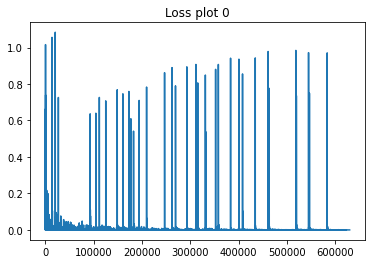

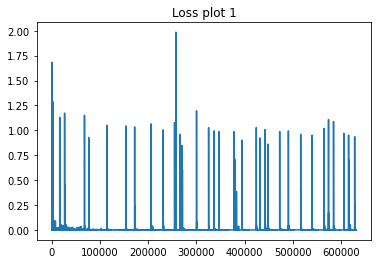

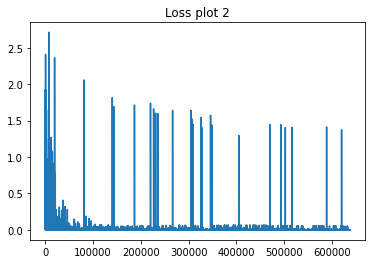

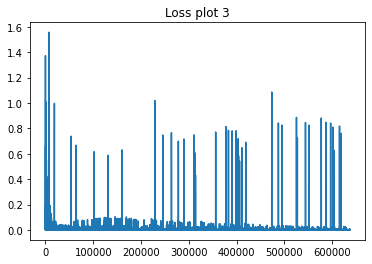

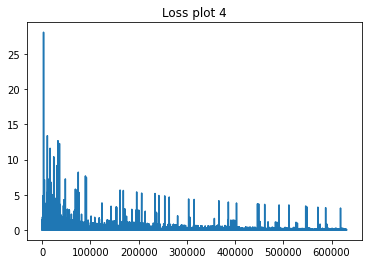

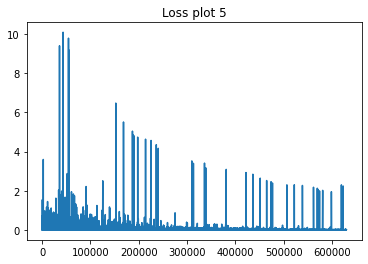

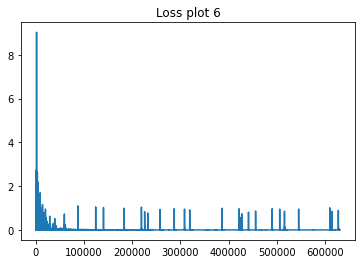

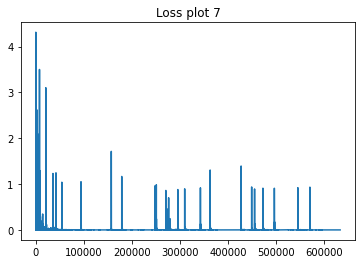

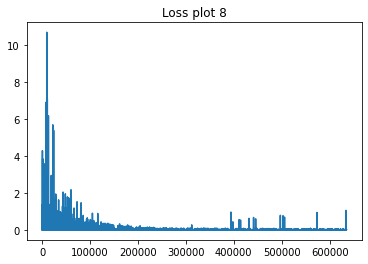

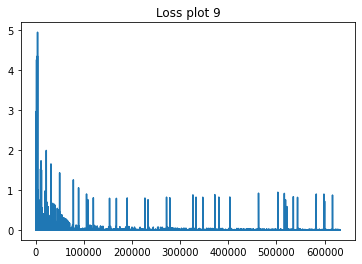

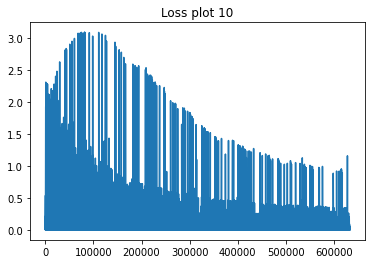

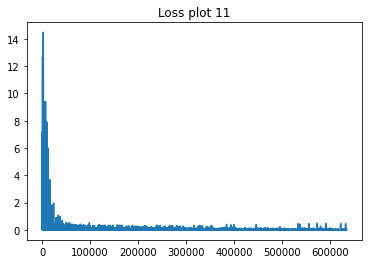

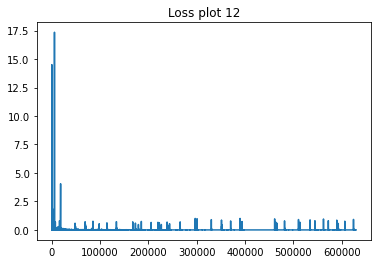

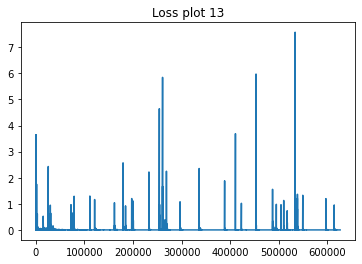

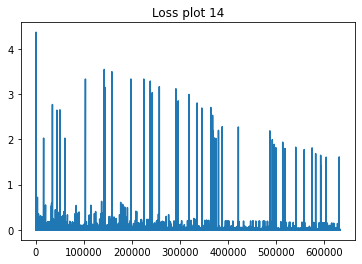

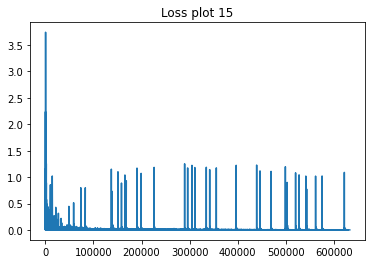

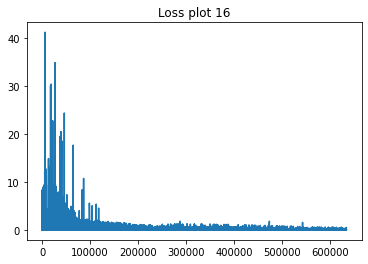

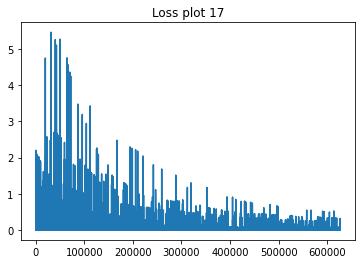

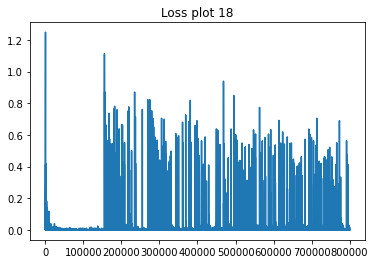

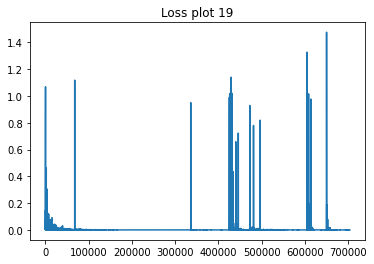

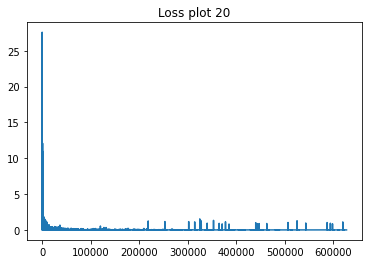

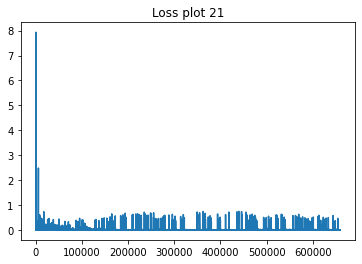

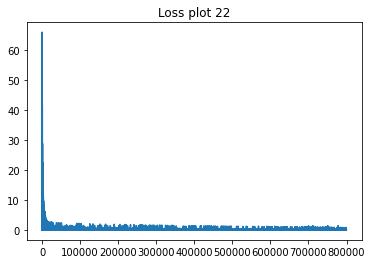

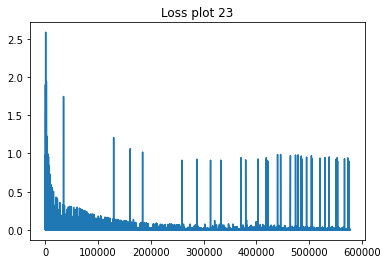

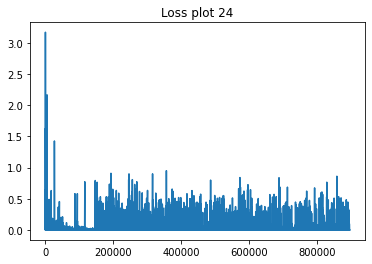

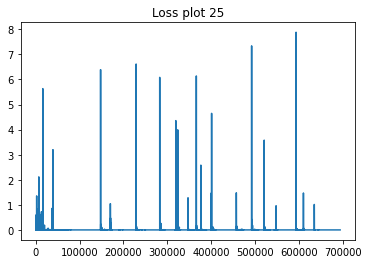

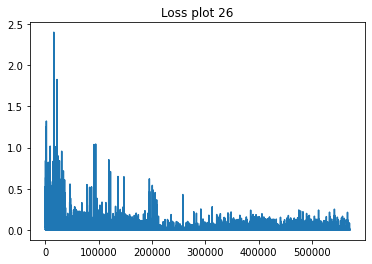

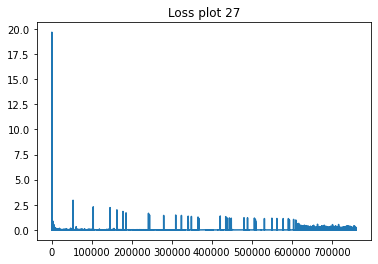

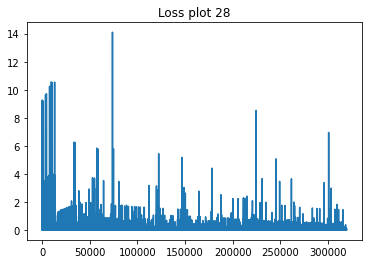

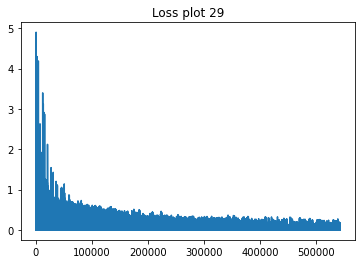

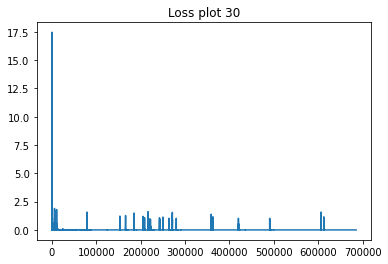

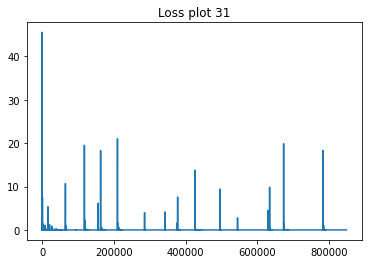

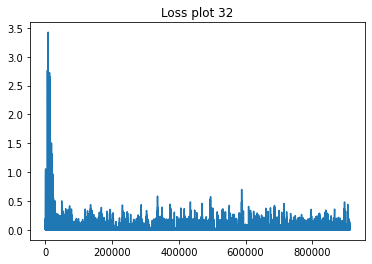

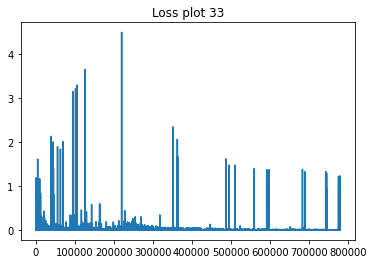

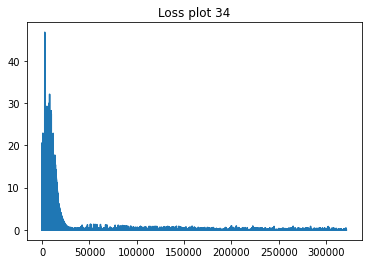

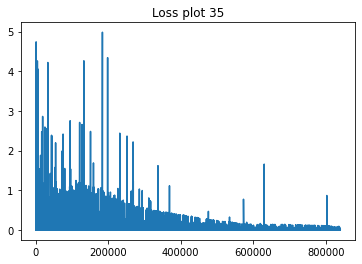

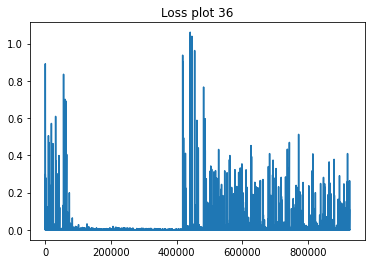

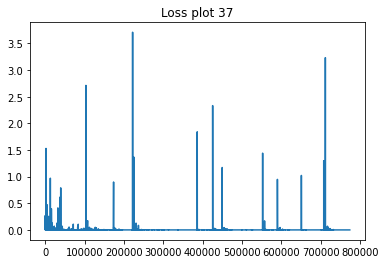

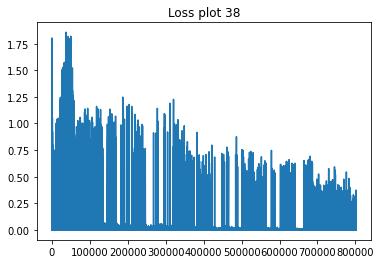

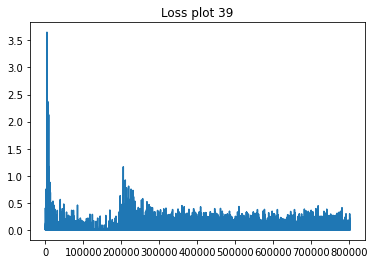

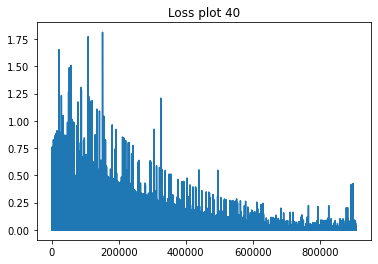

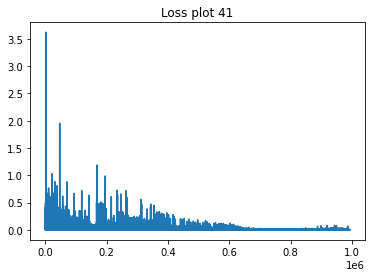

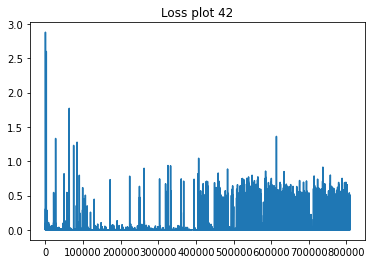

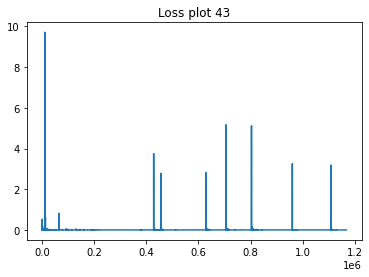

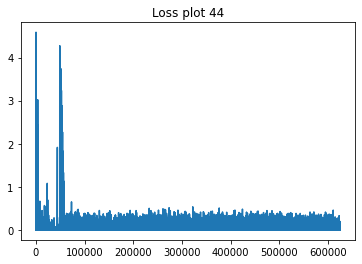

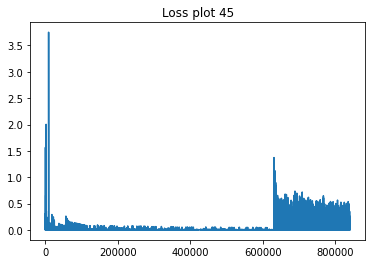

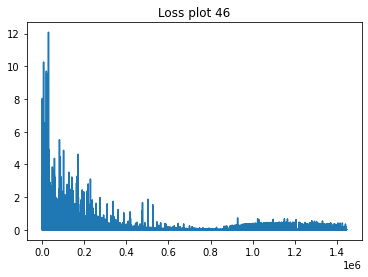

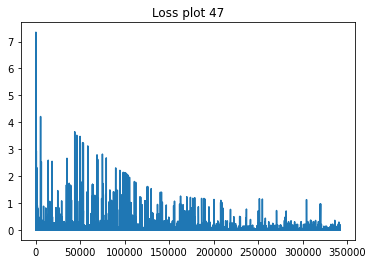

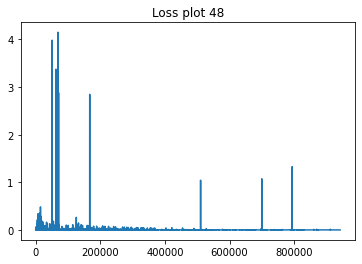

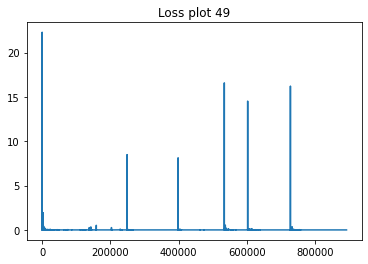

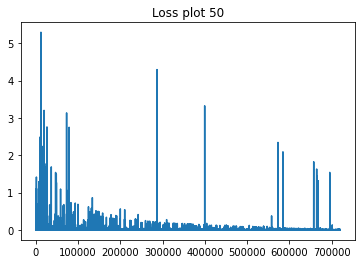

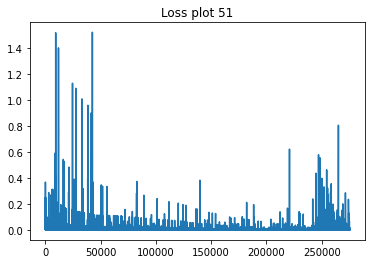

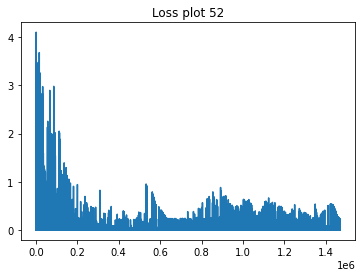

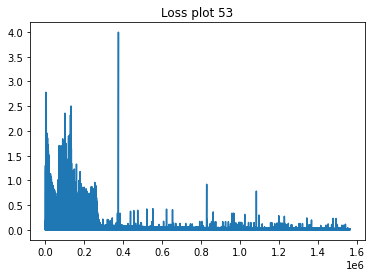

In [54]:
for i in range(len(loss_per_model)):
    lis = loss_per_model[i]
    plt.plot(lis)
    plt.title("Loss plot "+str(i))
    plt.savefig(f'{losses_folder}/LossPlot_lfadetwv_'+str(i))
    plt.show()


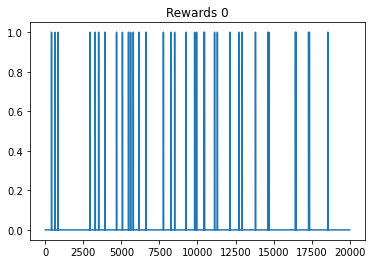

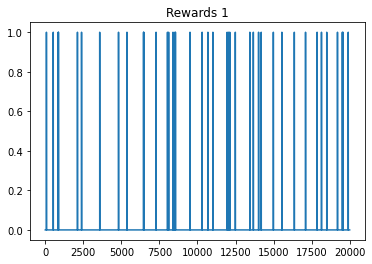

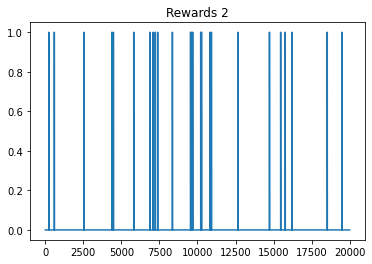

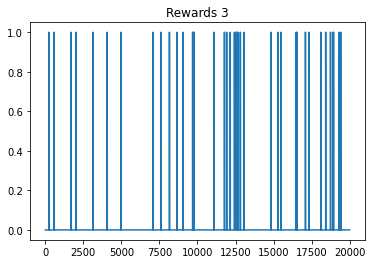

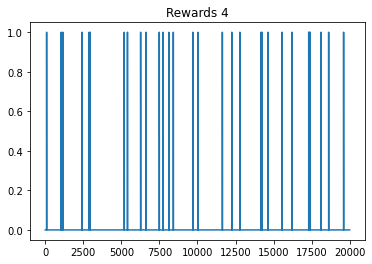

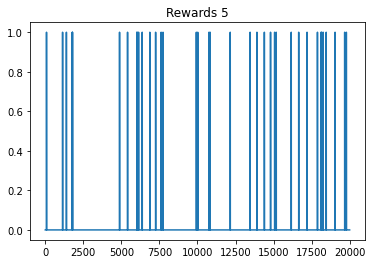

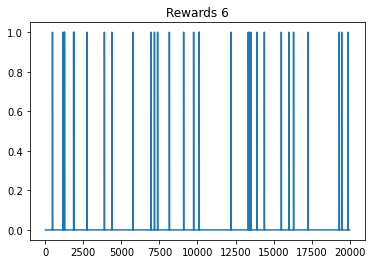

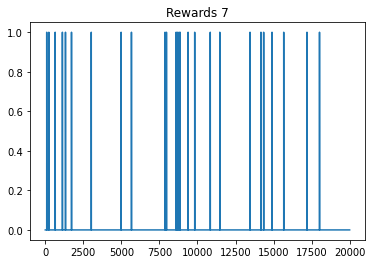

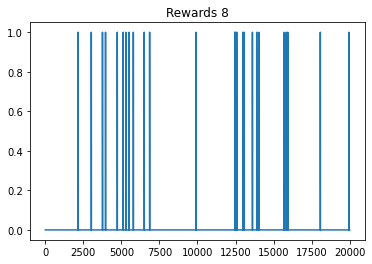

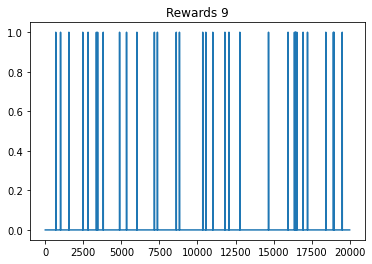

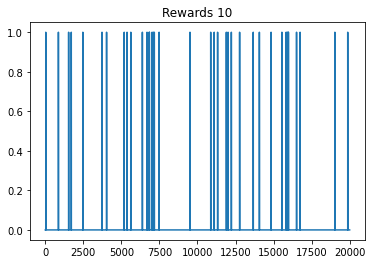

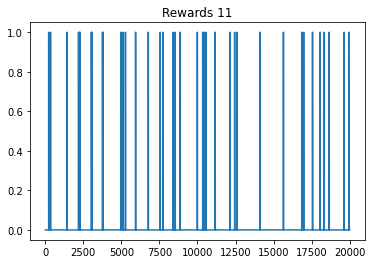

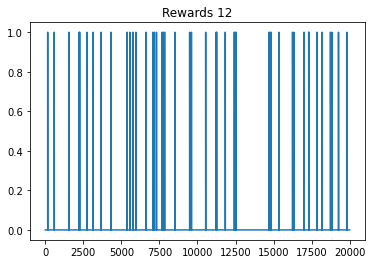

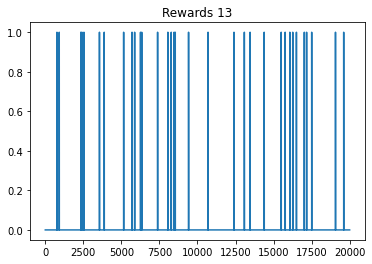

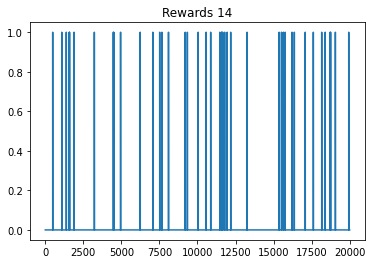

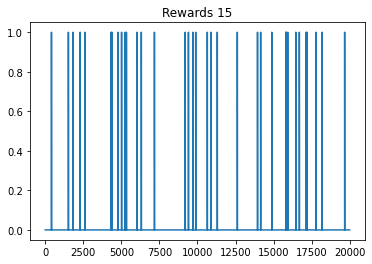

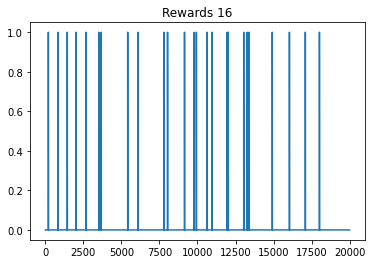

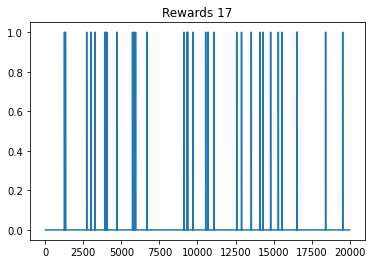

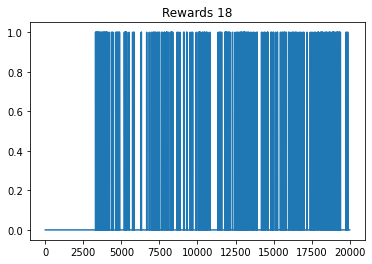

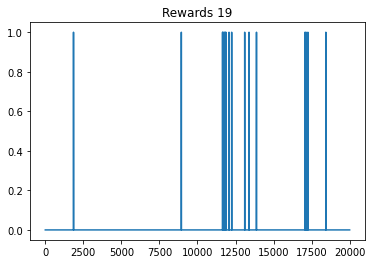

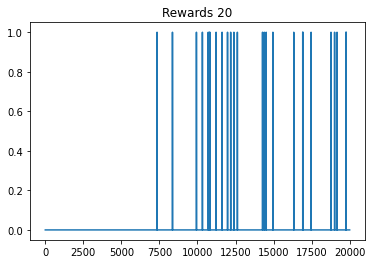

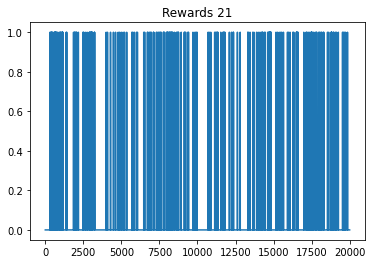

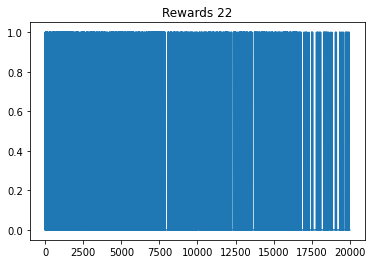

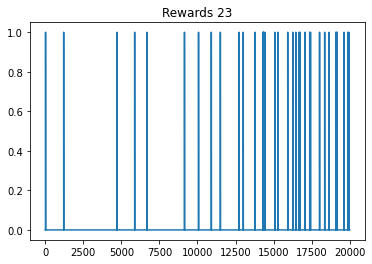

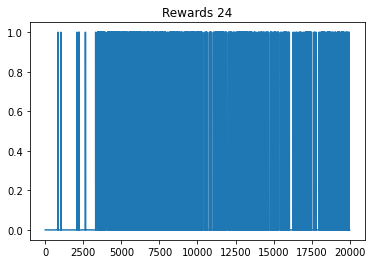

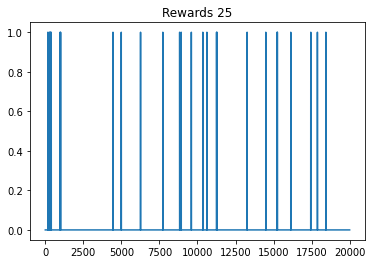

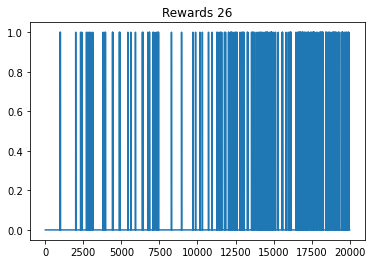

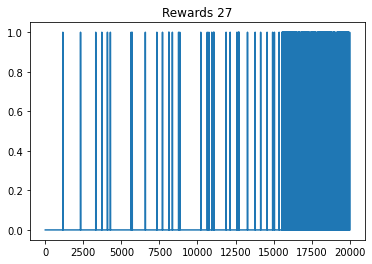

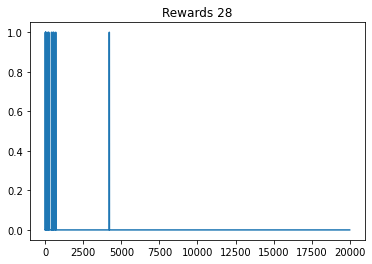

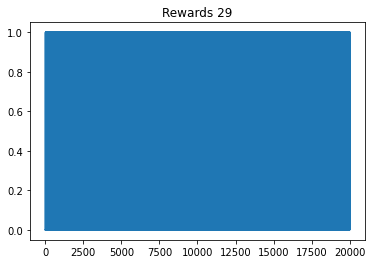

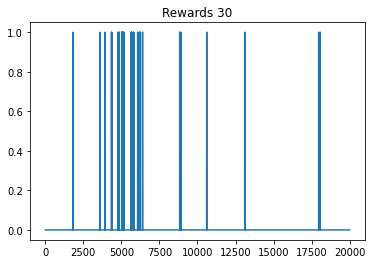

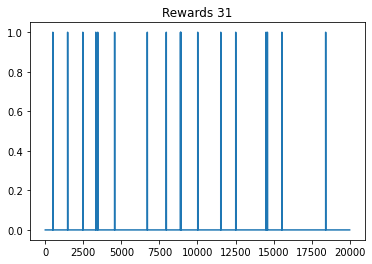

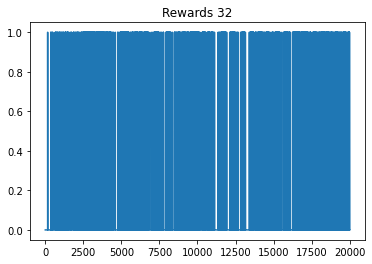

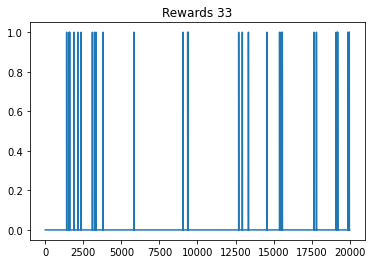

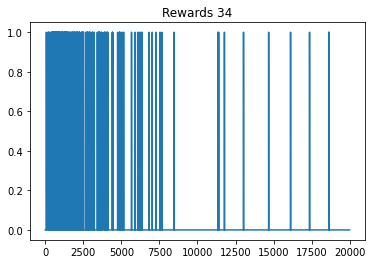

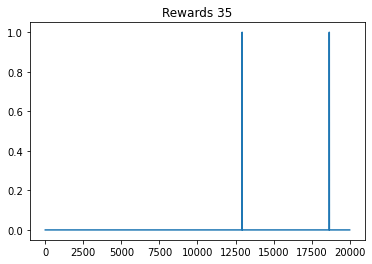

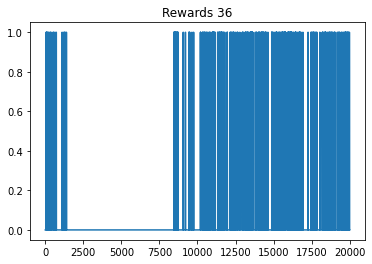

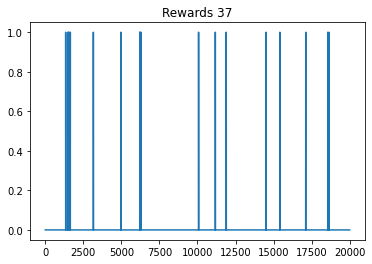

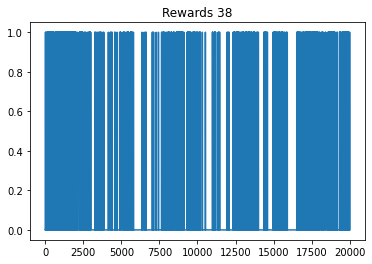

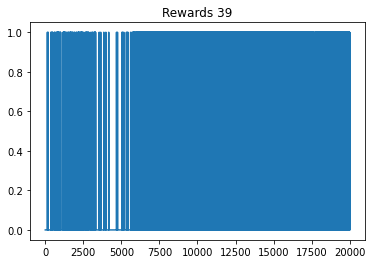

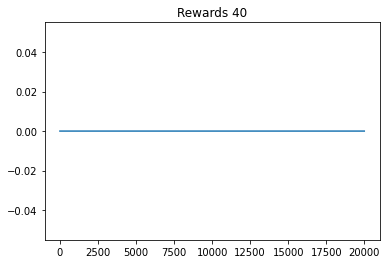

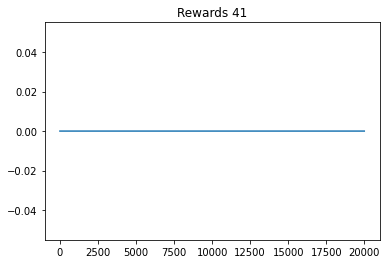

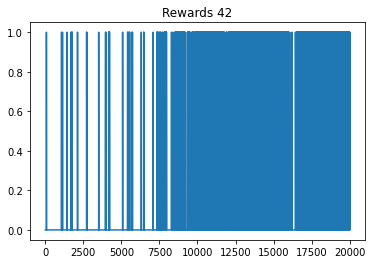

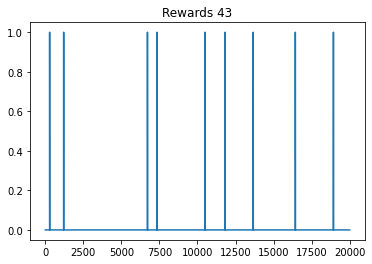

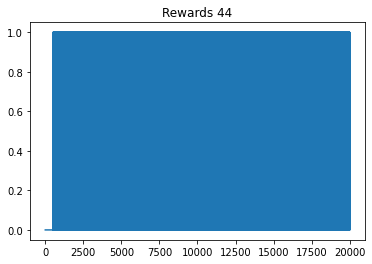

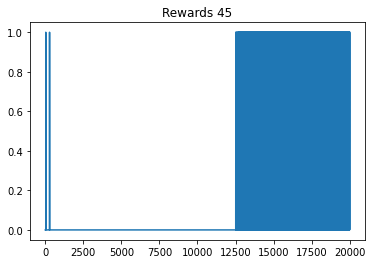

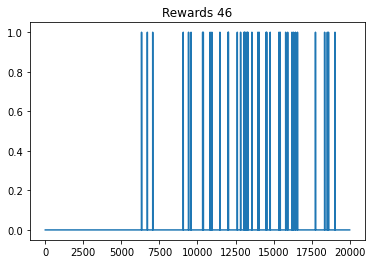

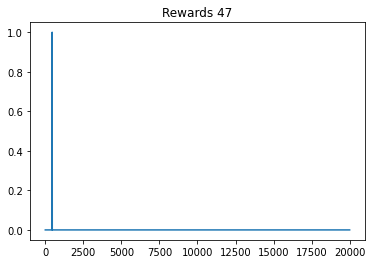

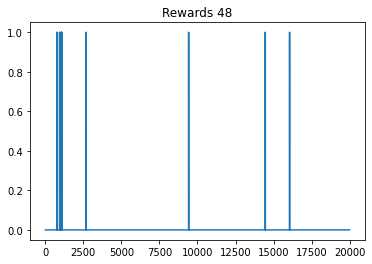

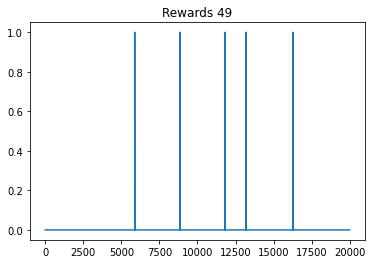

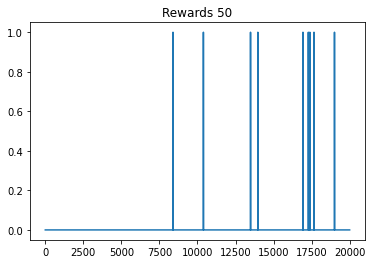

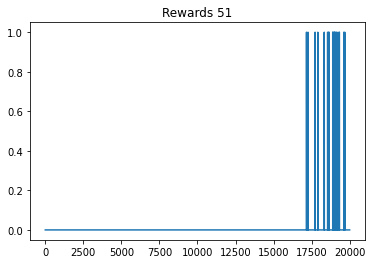

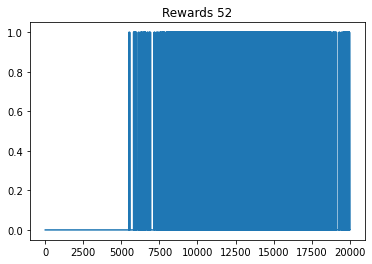

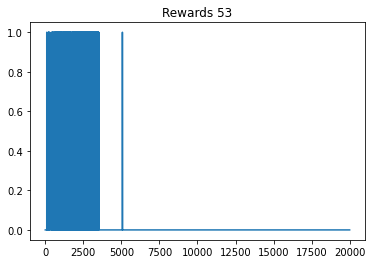

In [55]:
for i in range(len(rewards_per_model)):
    lis = rewards_per_model[i]
    plt.plot(lis)
    plt.title("Rewards "+str(i))
    plt.savefig(f'{rewards_folder}/RewardPlot_lfadetwv_'+str(i))
    plt.show()

In [56]:
!zip -r /content/linear_ql_losses.zip /content/linear_ql_losses
!zip -r /content/linear_ql_rewards.zip /content/linear_ql_rewards

  adding: content/linear_ql_losses/ (stored 0%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_36.png (deflated 7%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_44.png (deflated 10%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_15.png (deflated 11%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_51.png (deflated 6%)
  adding: content/linear_ql_losses/LossPlot_lfaestwv3.png (deflated 7%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_41.png (deflated 10%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_22.png (deflated 13%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_2.png (deflated 6%)
  adding: content/linear_ql_losses/LossPlot_lfaestwv29.png (deflated 10%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_12.png (deflated 12%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_37.png (deflated 9%)
  adding: content/linear_ql_losses/LossPlot_lfadetwv_23.png (deflated 8%)
  adding: content/linear_ql_losses/LossPlot_lfaestwv20.png (de

In [57]:
from google.colab import files
files.download("/content/linear_ql_losses.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
files.download("/content/linear_ql_rewards.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## No totally ready: Q-learning with LFA ( weight matrix )

In [ ]:
import gym
 
actions_names = {
    'Left': 0,
    'Down': 1,
    'Right': 2, 
    'Up': 3
}
  
env = gym.make("FrozenLake-v0", is_slippery=False, map_name='8x8')
env.reset()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from datetime import datetime 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle
import time


class LinearModel:
	# Linear Regression
	def __init__(self,n_features, action_dim):
		self.W = np.random.randn(n_features, action_dim) / np.sqrt(n_features)
		self.b = np.zeros(action_dim)
		#self.W = np.random.randn(n_features)# / np.sqrt(n_features)
		#self.b = 0

		# momentum terms 
		self.vW = 0
		self.vb = 0

		self.losses = []	

	def predict(self,X): # return an array of 4 values
		if(X.shape[0] > 1 ): #(s,a_0)(s,a_1)(s,a_2)(s,a_3)
			nacts = self.W.shape[1]
			res = np.zeros(nacts)
			for i in range(nacts):
				dot = X[i].dot(self.W[:,i])  + self.b[i]
				res[i] = dot
			return res
		else:
			return X.dot(self.W) + self.b #(s,a_x)

	def sgd(self, X, Y, learning_rate=0.01, momentum=0.9): # Stochastic gradent descent
		Yhat= self.predict(X)
		gW= 2*X.T.dot(Yhat - Y)
		gb= 2*(Yhat-Y).sum(axis=0)

		self.vW = momentum * self.vW - learning_rate * gW
		self.vb = momentum * self.vb - learning_rate * gb 

		self.W +=  self.vW
		self.b +=  self.vb

		mse = np.mean((Yhat-Y)**2)
		self.losses.append(mse)	

	def sgd2(self, X, Y, learning_rate=0.01, momentum=0.9): # Stochastic gradent descent
		assert(len(X.shape)==2)

		num_values=np.prod(Y.shape) # 4 values , 4 actions

		Yhat= self.predict(X)
		gW= 2*X.T.dot(Yhat - Y)/num_values
		gb= 2*(Yhat-Y).sum(axis=0)/num_values

		self.vW = momentum * self.vW - learning_rate * gW
		self.vb = momentum * self.vb - learning_rate * gb 

		self.W +=  self.vW
		self.b +=  self.vb

		mse = np.mean((Yhat-Y)**2)
		self.losses.append(mse)

	def save_weights(self,filepath):
		np.savez(filepath, W=self.W, b=self.b)

	def load_weights(self,filepath):
		npz = np.load(filepath)
		self.W = npz['W']
		self.b = npz['b']

In [ ]:
def make_directory(directory):
	if not os.path.exists(directory):
		os.makedirs(directory)
  
#def load(name):
	#model.load_weights(name)

#def save(name):
	#model.save_weights(name)
  
def _next_position(row, col, action):
    row_next = -1
    col_next = -1
    if action == 0:
        row_next, col_next = row, col - 1
    elif action == 1:
        row_next, col_next = row + 1, col
    elif action == 2:
        row_next, col_next = row, col + 1
    elif action == 3:
        row_next, col_next = row - 1, col

    row_next = max(0, min(row_next, 7))
    col_next = max(0, min(col_next, 7))

    return row_next, col_next

def getFeatures(state, action):
	n_rows, n_cols = (8, 8)

	row, col = state // n_rows, state % n_cols

	row_next, col_next = _next_position(row, col, action)

	row, col = row / (n_rows - 1), col / (n_cols - 1)
	state_features = np.array([row, col, row * col,
							row**2, col**2,
							row**3, col**3,
							row**4, col**4])
	
	row_next, col_next = row_next / (n_rows - 1), col_next / (n_cols - 1)
	action_features = np.array([row_next, col_next, row_next * col_next,
							row_next**2, col_next**2,
							row_next**3, col_next**3,
							row_next**4, col_next**4])

	features = np.concatenate(
		[[1.0], state_features, action_features])
 
	#features = np.reshape(features,(1, features.size))
	return features
	
def getFeatures2(state):
	n_rows, n_cols = (8, 8)

	row, col = state // n_rows, state % n_cols

	row, col = row / (n_rows - 1), col / (n_cols - 1)
	state_features = np.array([row, col, row * col,
							row**2, col**2,
							row**3, col**3,
							row**4, col**4])

	features = np.concatenate(
		[[1.0], state_features])
 
	#features = np.reshape(features,(1, features.size))
	return features

def FindAction2(state, actions):
	rand = np.random.rand()
	if rand <= epsilon:
		return np.random.choice(action_size) # return random action with probability epsilon
	
	action_values = np.zeros((action_size, n_features))
	
	# get features of the (s,a0) (s, a1) (s, a2) (s, a3)
	for action in actions:
		x = getFeatures(state, action)
		action_values[action] = x
	
	# predict set of features per action with the weight matrix
	qvalues = model.predict(action_values) 
	
	return np.argmax(qvalues[0]) 


def train(statef, action, reward, next_statef, done, epsilon):
	if done:
		target = reward
	else: 
		# compute the official one-step Bellman backup updates 
		target = reward + gamma * np.amax(model.predict(next_statef), axis = 1) # Q-Learning			
	
	target_full = model.predict(statef) # Get the values based on the old parameters W,b
	target_full[0,action] = target # update the entry of the corresponding action 

	model.sgd2(statef, target_full) # Stochastic gradient descent. Run one training step and update W, b

	if epsilon > epsilon_min: # decrease the probability of exploration
		epsilon *= epsilon_decay
	
	return target

In [ ]:
def play_one_episode( env, is_train, stats, e):

    #state = scaler.transform([[state]]) # scale the state vector
    state = env.reset() # get the initial state 
    actions = np.arange(number_actions)
    done = False

    action = FindAction2(state, actions)   
    statef = getFeatures(state, action)    

    while not done:    
        next_state, reward, done, info = env.step(action)
        action_next = FindAction2(next_state, actions)
        next_statef = getFeatures(next_state, action_next)

        next_statef = np.reshape(next_statef,(1, next_statef.size))
        statef = np.reshape(statef,(1, next_statef.size))
        #next_state = scaler.transform([[next_state]]) # scale the next state
        if is_train == 'train': # if the mode is training
            train(statef, action, reward, next_statef, done, epsilon) # Q-Learning with states' aggregation
        
        statef = next_statef # got to next state
        action = action_next

        stats[e] += reward  

In [ ]:

state_size = env.observation_space.n  # env.state_dimension # initialize state dimension

#getFeatures
n_features = 19

#getFeatures2 (only state features)
#n_features = 9
action_size = env.action_space.n  # initialize actions dimension


momentum = 0.9      # 'momentum': [0.5, 0.7, 0.9]
learning_rate = 0.01    # 'learning_rate': [0.1, 0.01, 0.001]
gamma = 0.95 # discount factor  'gamma': [1, 0.9, 0.1]
epsilon = 0.5 # exploration     'epsilon':[0.5, 0.1]

epsilon_min = 0.01
epsilon_decay = 0.995

number_actions = env.nA
actions = np.arange(number_actions)

num_episodes= 20000 # epochs
stats = np.zeros(num_episodes)
mode = 'train'
model = LinearModel(n_features, action_size)

In [ ]:
models_folder = 'linear_rl_model' # to store the Q-model prarameters
rewards_folder = 'linear_rl_rewards' # to store the values of episodes
make_directory(models_folder)
make_directory(rewards_folder)


num_episodes = 20000

if mode == 'test':
	# remake the env with the test data
	#env = StockEnv(test_data, initial_investment)
	load(f'{models_folder}/linear.npz')

for e in range(num_episodes):
	t0 = datetime.now()
	play_one_episode(env, 'train', stats, e)
	dt = datetime.now() - t0

	if stats[e] > 0.0:
		print(f"Win episode: {e +1}/{num_episodes}, rewards: {stats[e]:.2f}, duration: {dt}")
		env.render()
		time.sleep(0.1) 
	
	save(f'{models_folder}/linear.npz')

plt.plot(model.losses)
plt.title("Losses of the "+mode+" model")
plt.show()

plt.plot(stats)
plt.title("Rewards "+mode+" model")
plt.show()


## No totally ready: Q-learning with LFA ( weight matrix ) withPG parametricgrid